카이제곱 검정 : 모분산 모평균 모를때 정질성 검정

In [1]:
import numpy as np
from scipy.stats import chi2_contingency

# 교차표 데이터 (contingency table)
data = np.array([
    [30, 20],  # 남성
    [20, 30]   # 여성
])

# 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(data)

# 결과 출력
print("Chi-Square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

# 유의 수준 0.05 기준으로 해석
if p < 0.05:
    print("👉 성별과 제품 선호 사이에 통계적으로 유의한 관계가 있습니다.")
else:
    print("👉 성별과 제품 선호 사이에 유의한 관계가 없습니다.")

Chi-Square statistic: 3.24
p-value: 0.07186063822585143
Degrees of freedom: 1
Expected frequencies:
 [[25. 25.]
 [25. 25.]]
👉 성별과 제품 선호 사이에 유의한 관계가 없습니다.


In [2]:
from scipy.stats import chisquare

# 관측값 (observed frequencies)
observed = [18, 33, 49]

# 기대값 (expected frequencies)
expected = [20, 30, 50]
# 기대값은 각 카테고리에 대해 "기대되는 빈도 수"로, 퍼센트(확률)이 아니라 빈도로 써야 함.

# 카이제곱 검정 수행
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)

# 해석
alpha = 0.05
if p_value < alpha:
    print("귀무가설 기각: 분포가 다르다고 볼 수 있음")
else:
    print("귀무가설 채택: 분포에 차이가 없다고 볼 수 있음")

Chi-square statistic: 0.52
p-value: 0.7710515858035664
귀무가설 채택: 분포에 차이가 없다고 볼 수 있음


f 검정  두집단간 분산 동일성 검정

In [2]:
import numpy as np
from scipy import stats

# 두 그룹의 데이터
group1 = np.array([12, 7, 3, 7, 8, 9, 11, 9])
group2 = np.array([22, 19, 20, 23, 21, 18, 24])

# 각 그룹의 분산 계산 (ddof=1은 표본분산)
var1 = np.var(group1, ddof=1)
var2 = np.var(group2, ddof=1)

# 자유도
df1 = len(group1) - 1
df2 = len(group2) - 1

# F통계량 계산: 더 큰 분산을 분자로
if var1 > var2:
    F = var1 / var2
    dfn, dfd = df1, df2
else:
    F = var2 / var1
    dfn, dfd = df2, df1

# 유의수준
alpha = 0.05

# p-value 계산
p_value = 1 - stats.f.cdf(F, dfn, dfd)
p_value *= 2  # 양측 검정

print(f"F-statistic: {F:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < alpha:
    print("두 그룹의 분산이 유의미하게 다릅니다. (등분산 아님)")
else:
    print("두 그룹의 분산에 유의미한 차이가 없습니다. (등분산 가정 가능)")


F-statistic: 1.6378
p-value: 0.5644
두 그룹의 분산에 유의미한 차이가 없습니다. (등분산 가정 가능)


상관도 구하기

In [4]:
from scipy.stats import pearsonr
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'A': np.random.rand(10),
    'B': np.random.rand(10),
    'C': np.random.rand(10)
})

x = df['A']
y = df['B']

corr_coef, p_value = pearsonr(x, y)
print("Correlation coefficient:", corr_coef)
print("P-value:", p_value)

from scipy.stats import spearmanr

# # 예제 데이터
# x = [1, 2, 3, 4, 5]
# y = [5, 6, 7, 8, 7]

# Spearman 상관계수와 p-value 계산
corr, p_value = spearmanr(x, y)

print("Spearman 상관계수:", corr)
print("p-value:", p_value)

Correlation coefficient: 0.4970187518785008
P-value: 0.14388094576843258
Spearman 상관계수: 0.4424242424242424
p-value: 0.20042268671194224


 상관계수의 t-검정 공식
    $$
   t= \frac{\gamma * \sqrt{n-2}}{\sqrt{1-\gamma^2}}
    $$


In [5]:
import numpy as np
from scipy.stats import t

# 예제 데이터
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 6, 7, 8, 9])

# Pearson 상관계수 계산
r = np.corrcoef(x, y)[0, 1]
n = len(x)

# t-통계량 계산
t_stat = r * np.sqrt(n - 2) / np.sqrt(1 - r**2)

# p-value 계산 (양측검정)
p_value = 2 * (1 - t.cdf(abs(t_stat), df=n - 2))

print(f"r = {r:.3f}")
print(f"t = {t_stat:.3f}")
print(f"p-value = {p_value:.5f}")


r = 1.000
t = 116235962.086
p-value = 0.00000


일표본 t-test 모집단의 구성요소들이 정규분포 이룬다고 가정 연속변수 
    $$
   t= \frac{x-\mu_0}{\frac{s}{\sqrt{n}}}=t(df) , df=n-1
    $$


In [6]:
import numpy as np
from scipy import stats

# 샘플 데이터 (예: 제품 무게 10개)
sample = np.array([98.5, 99.0, 101.2, 100.5, 100.8, 99.7, 98.9, 100.1, 99.8, 100.3])

# 귀무가설의 평균값 (예: 제품의 주장된 평균 무게 100g)
popmean = 100.0

# 일표본 t-검정 수행
t_statistic, p_value = stats.ttest_1samp(sample, popmean)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

# 유의수준 0.05 기준 해석
alpha = 0.05
if p_value < alpha:
    print("귀무가설 기각: 샘플 평균은 모집단 평균과 유의미하게 다릅니다.")
else:
    print("귀무가설 채택: 샘플 평균은 모집단 평균과 유의미하게 다르지 않습니다.")


t-statistic: -0.4341447631754699
p-value: 0.6744051171881851
귀무가설 채택: 샘플 평균은 모집단 평균과 유의미하게 다르지 않습니다.


t test전에 데이터가 정규성을 만족하는지 정규성검증을 해야한다.  
1) 콜모고로프 스미루노프 검증
2) q-q plot
3) 사피로 윌크 검정 -> 데이터가 적을때 씀

In [7]:
import numpy as np
from scipy import stats

# 샘플 데이터
sample = np.array([98.5, 99.0, 101.2, 100.5, 100.8, 99.7, 98.9, 100.1, 99.8, 100.3])

# Shapiro-Wilk 정규성 검정
shapiro_stat, shapiro_p = stats.shapiro(sample)

print("Shapiro-Wilk Test Statistic:", shapiro_stat)
print("p-value:", shapiro_p)

# 유의수준 기준 해석 (보통 0.05)
alpha = 0.05
if shapiro_p < alpha:
    print("정규성을 기각: 데이터는 정규분포를 따르지 않습니다.")
else:
    print("정규성을 채택: 데이터는 정규분포를 따른다고 볼 수 있습니다.")

# 데이터 정규화 (평균 0, 표준편차 1)
z_scores = (sample - np.mean(sample)) / np.std(sample, ddof=1)

# K-S 검정: 정규분포 N(0,1)과 비교
ks_stat, ks_p = stats.kstest(z_scores, 'norm')

print("K-S Test Statistic:", ks_stat)
print("p-value:", ks_p)

if ks_p < alpha:
    print("정규성을 기각: 데이터는 정규분포를 따르지 않습니다.")
else:
    print("정규성을 채택: 데이터는 정규분포를 따른다고 볼 수 있습니다.")


Shapiro-Wilk Test Statistic: 0.9690365195274353
p-value: 0.8817710280418396
정규성을 채택: 데이터는 정규분포를 따른다고 볼 수 있습니다.
K-S Test Statistic: 0.1429805335132176
p-value: 0.9690790847487338
정규성을 채택: 데이터는 정규분포를 따른다고 볼 수 있습니다.


대응표본 t검정 
    $$
   t= \frac{d}{\frac{s}{\sqrt{n}}}=t(df) , df=n-1
    $$

In [8]:
import numpy as np
from scipy import stats

# 예제 데이터: 운동 전과 후의 체중 (kg)
before = np.array([70.2, 68.5, 75.0, 80.1, 65.3, 78.8, 74.2, 69.5, 71.1, 76.4])
after  = np.array([69.0, 67.8, 74.5, 78.9, 64.0, 77.9, 73.1, 68.0, 70.3, 75.0])

# 대응표본 t-검정 수행
t_statistic, p_value = stats.ttest_rel(before, after)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

# 유의수준 해석
alpha = 0.05
if p_value < alpha:
    print("귀무가설 기각: 운동 전후 체중의 평균 차이는 유의미합니다.")
else:
    print("귀무가설 채택: 운동 전후 체중의 평균 차이는 유의미하지 않습니다.")


t-statistic: 10.350018422975475
p-value: 2.685293502135709e-06
귀무가설 기각: 운동 전후 체중의 평균 차이는 유의미합니다.


독립표본 t 검정 
    $$
   t= \frac{(X-Y)-\delta_0}{s_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}=t(df) , df=n_1+n_2-2
    $$
    $$
    s_p 는 두집답 공통 표준편차 (등분산)
    $$

In [9]:
import numpy as np
from scipy import stats

# 예제 데이터
male_scores = np.array([82, 85, 78, 90, 88, 76, 95, 89])
female_scores = np.array([79, 83, 75, 80, 77, 85, 84, 78])

# 독립표본 t-검정 수행
t_statistic, p_value = stats.ttest_ind(male_scores, female_scores, equal_var=True)  # 등분산 가정

print("t-statistic:", t_statistic)
print("p-value:", p_value)

# 유의수준 기준 해석
alpha = 0.05
if p_value < alpha:
    print("귀무가설 기각: 두 집단 간 평균 차이가 유의미합니다.")
else:
    print("귀무가설 채택: 두 집단 간 평균 차이는 유의미하지 않습니다.")


t-statistic: 2.024075399032559
p-value: 0.06247942877427797
귀무가설 채택: 두 집단 간 평균 차이는 유의미하지 않습니다.


In [10]:
# 좋은 질문입니다! 두 집단이 등분산이 아니라고 판단되면, Welch’s t-test를 사용해야 합니다. 이 경우 scipy.stats.ttest_ind() 함수에서 equal_var=False로 설정하면 됩니다.

import numpy as np
from scipy import stats

# 예제 데이터: 남학생과 여학생 점수
male_scores = np.array([82, 85, 78, 90, 88, 76, 95, 89])
female_scores = np.array([79, 83, 75, 80, 77, 85, 84, 78])

# Welch's t-test (이분산 가정)
t_stat, p_value = stats.ttest_ind(male_scores, female_scores, equal_var=False)

print("Welch’s t-statistic:", t_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("귀무가설 기각: 두 집단 평균 차이는 유의미합니다.")
else:
    print("귀무가설 채택: 두 집단 평균 차이는 유의미하지 않습니다.")


# 등분산 여부 확인 (Levene's Test)
levene_stat, levene_p = stats.levene(male_scores, female_scores)

print("Levene’s Test p-value:", levene_p)
if levene_p < alpha:
    print("분산이 다르다 → Welch's t-test 사용 (equal_var=False)")
else:
    print("분산이 같다 → 일반 t-test 사용 (equal_var=True)")


Welch’s t-statistic: 2.024075399032559
p-value: 0.06806498459457257
귀무가설 채택: 두 집단 평균 차이는 유의미하지 않습니다.
Levene’s Test p-value: 0.13672615837426916
분산이 같다 → 일반 t-test 사용 (equal_var=True)


등분산 검정에 대해 알려줘ㅏ


ChatGPT said:
등분산 검정(homogeneity of variance test 또는 equal variance test)은 두 개 이상의 집단의 분산(변동성)이 동일한지 여부를 검정하는 통계적 방법입니다. 이는 **분산분석(ANOVA)**나 독립표본 t-검정 등을 수행할 때 중요한 전제조건 중 하나입니다.
| 검정 방법                   | 특징                                 | 사용 조건                 |
| ----------------------- | ---------------------------------- | --------------------- |
| **Levene’s Test**       | 가장 널리 쓰임. 평균 또는 중앙값 기준. 이상치에 덜 민감. | 일반적인 경우               |
| **Bartlett’s Test**     | 정규성이 보장될 때 강력                      | 데이터가 정규분포를 따른다고 확신할 때 |
| **Brown–Forsythe Test** | Levene 변형 (중앙값 기준 사용)              | 이상치가 있는 경우 추천         |


In [1]:
from scipy.stats import levene

group1 = [10, 12, 14, 11, 13]
group2 = [22, 25, 20, 23, 24]

stat, p = levene(group1, group2)
print(f"검정통계량: {stat}, p-value: {p}")

if p > 0.05:
    print("등분산을 가정할 수 있음 (귀무가설 채택)")
else:
    print("등분산을 가정할 수 없음 (귀무가설 기각)")

검정통계량: 0.09999999999999995, p-value: 0.7599229683487395
등분산을 가정할 수 있음 (귀무가설 채택)


In [2]:
group1 = [10, 12, 14, 11, 13]
group2 = [22, 25, 20, 23, 24]
group3 = [30, 29, 31, 28, 32]

stat, p = levene(group1, group2, group3)


📌 실습 예시: F-검정통계량 직접 보기
F 값 크기	p-value	해석
작음	큼	등분산 가능 (귀무가설 채택)
큼	작음	등분산 아님 (귀무가설 기각)


In [3]:
import numpy as np
from scipy.stats import f

group1 = np.array([10, 12, 14, 11, 13])
group2 = np.array([22, 25, 20, 23, 24])

s1_sq = np.var(group1, ddof=1)
s2_sq = np.var(group2, ddof=1)

# 더 큰 분산을 분자로 사용
if s1_sq > s2_sq:
    F = s1_sq / s2_sq
    df1, df2 = len(group1)-1, len(group2)-1
else:
    F = s2_sq / s1_sq
    df1, df2 = len(group2)-1, len(group1)-1

# p-value (양측 검정)
p_value = 2 * min(f.cdf(F, df1, df2), 1 - f.cdf(F, df1, df2))

print(f"F-statistic: {F:.4f}")
print(f"p-value: {p_value:.4f}")


F-statistic: 1.4800
p-value: 0.7133


| 종류                         | 설명             | 예시                 |
| -------------------------- | -------------- | ------------------ |
| **일원분산분석 (One-way ANOVA)** | 하나의 독립변수만 고려   | 세 가지 치료법 간 평균 비교   |
| **이원분산분석 (Two-way ANOVA)** | 두 개의 독립변수 고려   | 성별 + 치료법에 따른 효과 비교 |
| **반복측정 ANOVA**             | 같은 집단을 여러 번 측정 | 시간에 따른 효과 변화       |


✅ 1. 일원분산분석 (One-Way ANOVA)
한 개의 독립변수(그룹)에 따른 종속변수의 평균 차이 분석

📌 주의사항
등분산성 (Levene 검정으로 확인)

정규성 (샤피로-윌크 검정 등)

그룹 간 독립성



In [ ]:
from scipy.stats import f_oneway

# 그룹별 샘플 데이터
group1 = [8, 9, 6, 7, 10]
group2 = [14, 15, 13, 14, 16]
group3 = [7, 8, 6, 5, 7]

# 일원분산분석 수행
# 집단간 SSB k-1 MSB=SSB/k-1   F=MSB/MSW
# 집단내 SSW N-k MSW=SSW/N-k  
# 전체  SST N-1
# 집단 k개, 표본 m 
# SSB= m * SUM_i_k(i번째 집단 평균 - 총평균)^2
# SSW= SUM_i_k (SUM_j_m (관측치-집단내 평균)^2)

f_stat, p_val = f_oneway(group1, group2, group3)

print("📌 One-Way ANOVA")
print(f"F-통계량: {f_stat:.4f}, p-value: {p_val:.4f}")


📌 One-Way ANOVA
F-통계량: 50.8627, p-value: 0.0000


In [11]:
import numpy as np
from scipy import stats
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 예제 데이터
group_A = [82, 85, 88, 90, 86]
group_B = [75, 78, 74, 77, 76]
group_C = [90, 92, 88, 94, 91]

# 1. ANOVA 수행
f_stat, p_value = stats.f_oneway(group_A, group_B, group_C)
print("ANOVA F-Statistic:", f_stat)
print("p-value:", p_value)

# 2. 사후분석 (Tukey HSD)
# 데이터를 하나로 합치고 그룹 라벨도 함께 구성
data = group_A + group_B + group_C
labels = ['A']*len(group_A) + ['B']*len(group_B) + ['C']*len(group_C)

df = pd.DataFrame({'score': data, 'group': labels})

# Tukey HSD 테스트
tukey_result = pairwise_tukeyhsd(endog=df['score'], groups=df['group'], alpha=0.05)
print(tukey_result)
# reject=True인 항목은 두 그룹 간에 통계적으로 유의미한 차이가 있다는 뜻입니다.

ANOVA F-Statistic: 52.706586826347255
p-value: 1.1396894123109079e-06
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B    -10.2    0.0 -14.181 -6.219   True
     A      C      4.8 0.0188   0.819  8.781   True
     B      C     15.0    0.0  11.019 18.981   True
---------------------------------------------------


✅ 2. 이원분산분석 (Two-Way ANOVA)
두 개의 독립변수에 따른 종속변수의 평균 차이 및 상호작용 효과 분석
statsmodels 패키지 사용

In [5]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 샘플 데이터 생성
data = pd.DataFrame({
    'Score': [80, 90, 85, 70, 65, 75, 95, 100, 85, 60, 65, 70],
    'Gender': ['M', 'M', 'M', 'F', 'F', 'F', 'M', 'M', 'M', 'F', 'F', 'F'],
    'Method': ['A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B']
})

# 이원분산분석 수행
model = ols('Score ~ C(Gender) + C(Method) + C(Gender):C(Method)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("📌 Two-Way ANOVA")
print(anova_table)


📌 Two-Way ANOVA
                          sum_sq   df      F    PR(>F)
C(Gender)            1408.333333  1.0  42.25  0.000188
C(Method)               8.333333  1.0   0.25  0.630536
C(Gender):C(Method)   133.333333  1.0   4.00  0.080516
Residual              266.666667  8.0    NaN       NaN


✅ 3. 다중요인 ANOVA (Multiple Factor ANOVA)

In [6]:
# 추가 독립변수 포함
data['AgeGroup'] = ['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'O', 'O', 'O', 'O', 'O', 'O']

# 다중 요인 ANOVA (세 요인)
model = ols('Score ~ C(Gender) + C(Method) + C(AgeGroup)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("📌 Multiple Factor ANOVA")
print(anova_table)


📌 Multiple Factor ANOVA
                  sum_sq   df           F    PR(>F)
C(Gender)    1408.333333  1.0   31.687500  0.000322
C(Method)    5345.454545  1.0  120.272727  0.000002
C(AgeGroup)  4609.090909  1.0  103.704545  0.000003
Residual      400.000000  9.0         NaN       NaN


✅ 4. 다변량분산분석 (MANOVA)
여러 개의 종속변수가 있을 때 각 독립변수에 대한 영향을 분석

In [ ]:
from statsmodels.multivariate.manova import MANOVA

# 다변량 종속변수 생성
data = pd.DataFrame({
    'Score1': [80, 90, 85, 70, 65, 75, 95, 100, 85, 60, 65, 70],
    'Score2': [82, 88, 84, 68, 60, 74, 98, 102, 88, 58, 62, 72],
    'Gender': ['M', 'M', 'M', 'F', 'F', 'F', 'M', 'M', 'M', 'F', 'F', 'F'],
    'Method': ['A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B']
})

# MANOVA 수행
manova = MANOVA.from_formula('Score1 + Score2 ~ C(Gender) + C(Method)', data=data)
print("📌 MANOVA")
print(manova.mv_test())
해석

C(Gender):

Wilks’ lambda = 0.2105, F = 15.0, p = 0.002

→ 성별은 Score1+Score2에 다변량으로 유의한 영향 있음

C(Method):

Wilks’ lambda = 0.671, F = 1.96, p = 0.203

→ 교수법(Method)은 두 점수를 동시에 고려했을 때 유의한 영향 없음

즉, 두 성적 변수를 종합적으로 보면 성별 차이는 있지만 교수법 차이는 없다 라고 해석합니다.

📌 MANOVA
                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept         Value  Num DF Den DF F Value  Pr > F
-------------------------------------------------------------
          Wilks' lambda  0.0191 2.0000 8.0000 205.8779 0.0000
         Pillai's trace  0.9809 2.0000 8.0000 205.8779 0.0000
 Hotelling-Lawley trace 51.4695 2.0000 8.0000 205.8779 0.0000
    Roy's greatest root 51.4695 2.0000 8.0000 205.8779 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
         C(Gender)        Value  Num DF Den DF F Value Pr > F
-------------------------------------------------------------
            Wilks' lambda 0.2105 2.0000 8.0000 15.0035 0.0020
           Pillai's trace 0.7895 2.0000 8.0000 15.0035 0.0020
   Hotelling-Lawl

📌 One-Way ANOVA 결과
F-통계량: 40.9756, p-value: 0.0000

📌 Tukey HSD 결과
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     A      B   5.3349 0.0001 2.4357  8.2341   True
     A      C  11.0052    0.0  8.106 13.9044   True
     B      C   5.6702    0.0  2.771  8.5694   True
---------------------------------------------------


/var/folders/hv/lqp1gn9n1ll0lbh2pfzn9pww0000gn/T/ipykernel_4466/3047284532.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Score', data=df, palette='Set2')


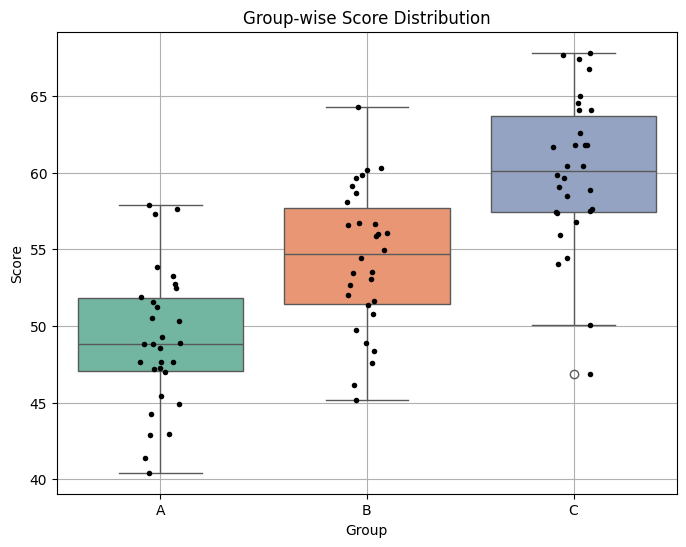

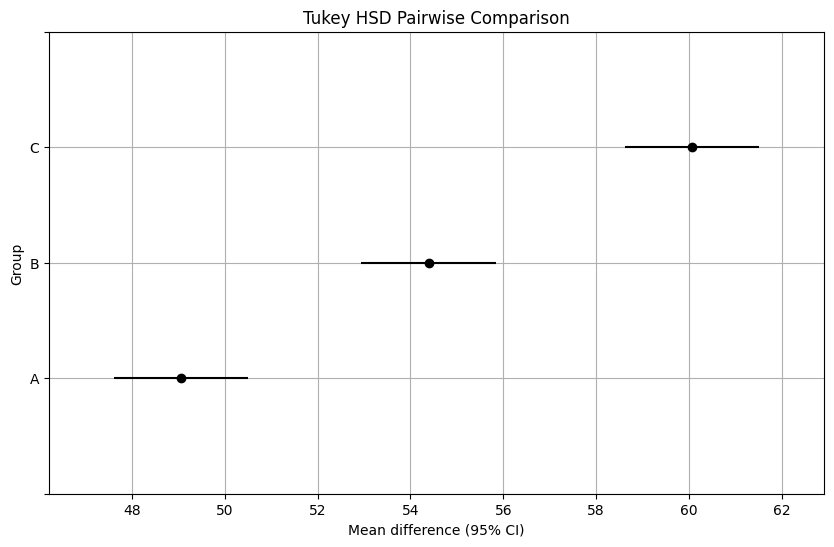

In [8]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
# 1. 데이터 준비
# --------------------------
np.random.seed(42)

# 세 그룹 생성
group_A = np.random.normal(loc=50, scale=5, size=30)
group_B = np.random.normal(loc=55, scale=5, size=30)
group_C = np.random.normal(loc=60, scale=5, size=30)

# DataFrame으로 통합
df = pd.DataFrame({
    'Score': np.concatenate([group_A, group_B, group_C]),
    'Group': ['A']*30 + ['B']*30 + ['C']*30
})

# --------------------------
# 2. One-Way ANOVA
# --------------------------
f_stat, p_val = f_oneway(group_A, group_B, group_C)
print("📌 One-Way ANOVA 결과")
print(f"F-통계량: {f_stat:.4f}, p-value: {p_val:.4f}\n")

# --------------------------
# 3. Tukey 사후 검정
# --------------------------
tukey = pairwise_tukeyhsd(endog=df['Score'], groups=df['Group'], alpha=0.05)

print("📌 Tukey HSD 결과")
print(tukey.summary())

# --------------------------
# 4. 시각화
# --------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Score', data=df, palette='Set2')
sns.stripplot(x='Group', y='Score', data=df, color='black', size=4, jitter=True)

plt.title('Group-wise Score Distribution')
plt.ylabel('Score')
plt.xlabel('Group')
plt.grid(True)
plt.show()

# --------------------------
# 5. Tukey 차이 시각화 (옵션)
# --------------------------
tukey.plot_simultaneous(ylabel='Group', xlabel='Mean difference (95% CI)')
plt.title('Tukey HSD Pairwise Comparison')
plt.grid(True)
plt.show()


ChatGPT said:
좋아요! 주어진 비율에 대해 카이제곱으로 검정하는 방법도 가능합니다.
이를 **카이제곱 적합도 검정 (Chi-Square Goodness of Fit Test)**이라고 합니다.

In [ ]:
from scipy.stats import chisquare

# 관측값
observed = [30, 70]

# 기대비율 기반 기대빈도
expected_proportions = [0.2, 0.8]
total = sum(observed)
expected = [p * total for p in expected_proportions]

# 카이제곱 적합도 검정
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print(f"Chi2 통계량: {chi2_stat:.4f}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("❌ 귀무가설 기각: 비율이 20:80이 아니다.")
else:
    print("✅ 귀무가설 채택: 비율이 20:80이라고 볼 수 있다.")


In [12]:
import statsmodels.api as sm
import pandas as pd

# 예제 데이터 생성
df = pd.DataFrame({
    'x1': [1, 2, 3, 4, 5],
    'x2': [2, 1, 3, 5, 4],
    'y':  [1, 3, 2, 5, 4]
})

# 독립변수와 종속변수 지정
X = df[['x1', 'x2']]
X = sm.add_constant(X)  # 절편항 추가
y = df['y']

# 회귀모형 적합
model = sm.OLS(y, X).fit()

# 회귀 결과 요약
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     1.857
Date:                Sat, 19 Jul 2025   Prob (F-statistic):              0.350
Time:                        16:52:59   Log-Likelihood:                -6.2030
No. Observations:                   5   AIC:                             18.41
Df Residuals:                       2   BIC:                             17.23
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5000      1.449      0.345      0.7

/opt/homebrew/Caskroom/miniforge/base/envs/general/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


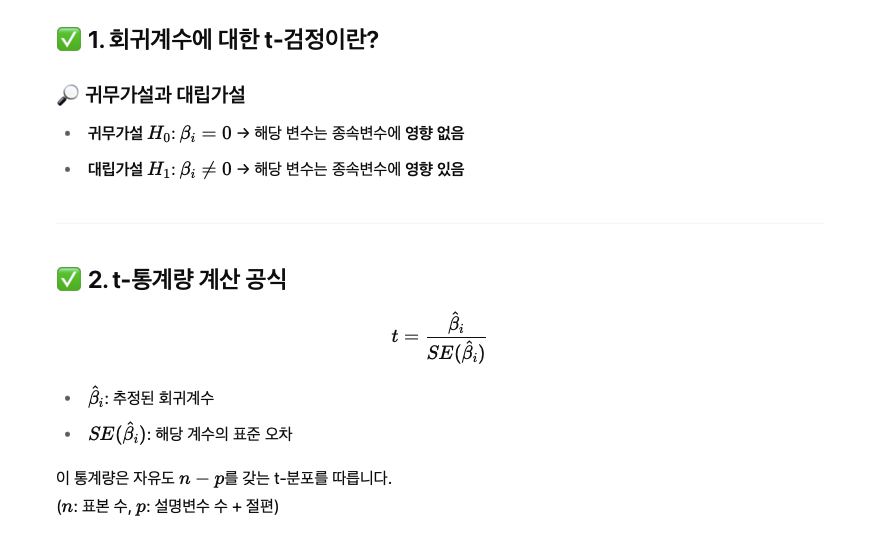

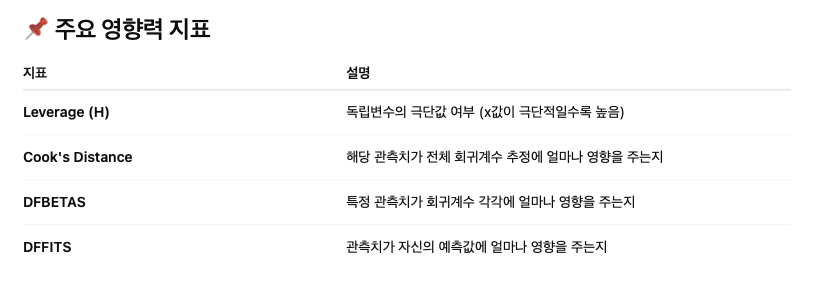
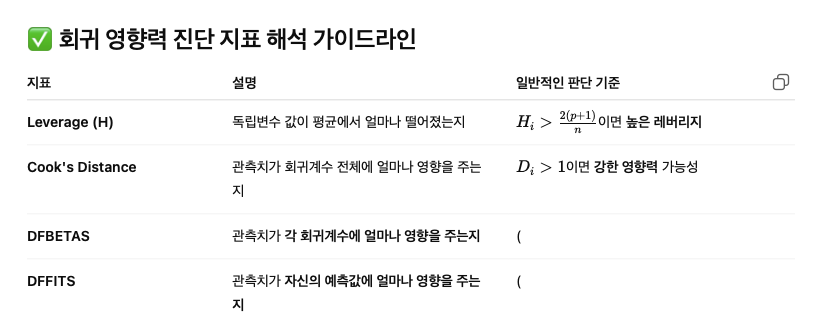

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# 예제 데이터셋
df = pd.DataFrame({
    'x1': [1, 2, 3, 4, 5, 20],  # 이상치 포함
    'y':  [2, 4, 6, 8, 10, 40]
})

# 모델 적합
X = sm.add_constant(df['x1'])
model = sm.OLS(df['y'], X).fit()

# 영향력 진단
influence = model.get_influence()

# 1. 레버리지 (Hii)
leverage = influence.hat_matrix_diag

# 2. 쿡의 거리 (Cook's Distance)
cooks_d, _ = influence.cooks_distance

# 3. DFBETAS
dfbetas = influence.dfbetas

# 4. DFFITS
dffits, _ = influence.dffits

# 결과 정리
influence_df = pd.DataFrame({
    'x1': df['x1'],
    'y': df['y'],
    'leverage_H': leverage,
    'cooks_distance': cooks_d,
    'dffits': dffits,
})

# DFBETAS는 계수별로 다차원이라 따로 추가
for i, param in enumerate(model.params.index):
    influence_df[f'dfbetas_{param}'] = dfbetas[:, i]

print("📋 영향력 진단 결과:")
print(influence_df.round(4))



In [ ]:
# 0은 오차가 양의 상관
# 4는 오차가 음의 상관
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from sklearn import datasets
import pandas as pd
data = datasets.load_diabetes()
df=pd.DataFrame(data['data'], index=data['target'], columns=data['feature_names'])
X=df.bmi.values.reshape(-1,1)
y=df.index.values.reshape(-1,1)
# 예시 데이터
model = sm.OLS(y, sm.add_constant(X)).fit()
dw = durbin_watson(model.resid)
print(f"Durbin-Watson 값: {dw}")
coefficients = model.params

Durbin-Watson 값: 1.848167023811597


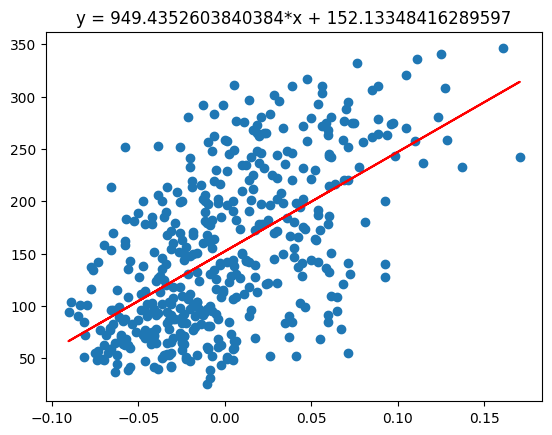

In [23]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model.predict(sm.add_constant(X)), color='red')
plt.title('y = {}*x + {}'.format(coefficients[1], coefficients[0]))
plt.show()

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# 예제 데이터프레임
df = pd.DataFrame({
    'X1': [10, 20, 30, 40, 50],
    'X2': [15, 25, 35, 45, 55],
    'X3': [1, 2, 1.3, 3.75, 2.25]
})

X = add_constant(df)

# VIF 및 Tolerance 계산
results = []
for i in range(X.shape[1]):
    vif = variance_inflation_factor(X.values, i)
    tol = 1 / vif
    results.append((X.columns[i], vif, tol))

# 결과 출력
vif_df = pd.DataFrame(results, columns=["Feature", "VIF", "Tolerance"])
print(vif_df)


  Feature       VIF  Tolerance
0   const  0.000000        inf
1      X1       inf   0.000000
2      X2       inf   0.000000
3      X3  1.647227   0.607081


/opt/homebrew/Caskroom/miniforge/base/envs/general/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/var/folders/hv/lqp1gn9n1ll0lbh2pfzn9pww0000gn/T/ipykernel_4466/3229121458.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  tol = 1 / vif
/opt/homebrew/Caskroom/miniforge/base/envs/general/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
from scipy.stats import norm
from scipy.stats import uniform 
from scipy.stats import chi2
from scipy.stats import t
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

## 문제1

1. 같은 실력을 가진 A, B 두사람이 100만원씩을 걸고 도박을 했다. 한 번 승리하면 승점 1점을
얻고, 먼저 승점 3점을 획득하면 배팅된 금액 200만원을 전부 갖게 된다. 현재 A는 승점 2점을
얻었고, B는 승점 1점을 얻은 상태이다. 현재 상태에서 게임을 중단한다면 A와 B의 상금을
어떻게 배분해야 공평한지 설명하시오.

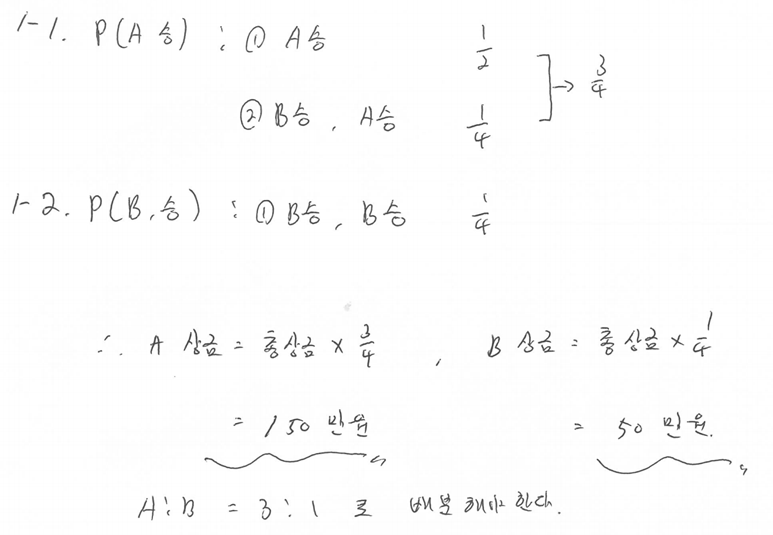

## 문제2

2. 거짓말 탐지기의 정확도는 97% 이고, 전체 인구중 1%가 거짓말쟁이다. 임의로 한명을 택하여
거짓말 탐지기로 검사를 한 결과, 거짓말을 했다는 결과가 나왔다. 이 사람이 실제 거짓말을
했을 확률은 얼마인가?

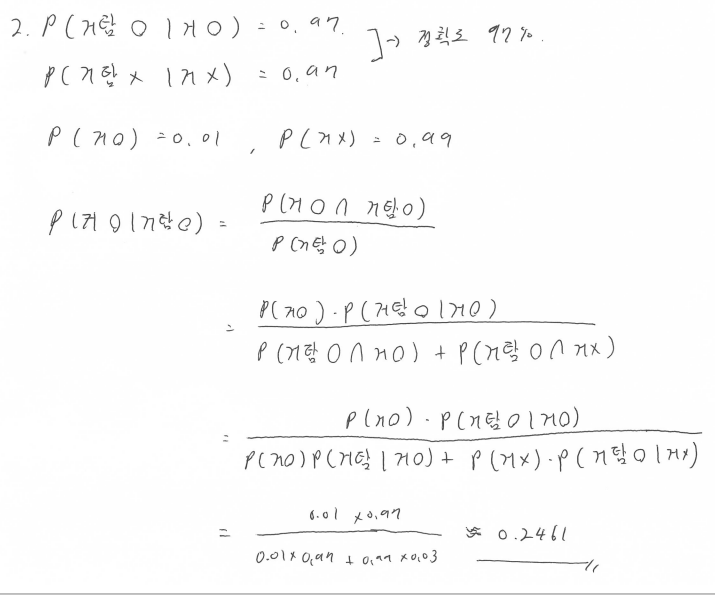

## 문제3

3. 지난 3년동안 주가가 5%이상 오른 기업중 60%가 이 기간동안 CEO를 교체 하였다. 그리고
같은 기간 주가가 5%이상 오르지 않은 기업중 CEO를 교체한 기업은 35%에 불과 했다. 주가
가 5% 이상 상승할 확률을 4%라고 했을 때, CEO를 해임하는 회사의 주식이 5%이상 상승할
확률은 얼마인가?

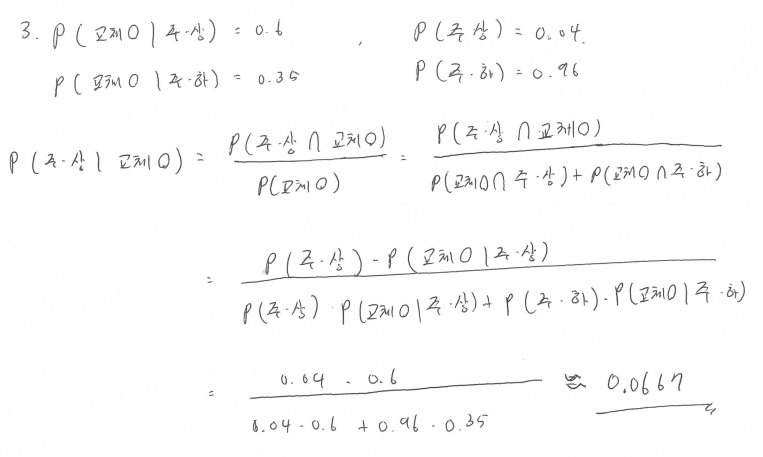

##문제 4

4. (Python) 각각의 분포에서 표본을 1000개를 생성하고, 이 데이터를 이용하여 왜도(skewness),
첨도(kurtosis)를 추정하시오.

(a) 왜도(Skewness): 분포가 한쪽으로 치우친 정도를 측정하는 통계량
i. N(0,2)과 χ(5) 표본을 생성한 후, 분포를 그리시오.
ii. 각 분포에서 왜도를 구하시오.


In [ ]:
normal_sample=norm.rvs(loc=0,scale=2, size=1000) #loc:평균 loc:표준편차
chi_sample=chi2.rvs(5,size=1000)

In [ ]:
from scipy.stats import kurtosis, skew

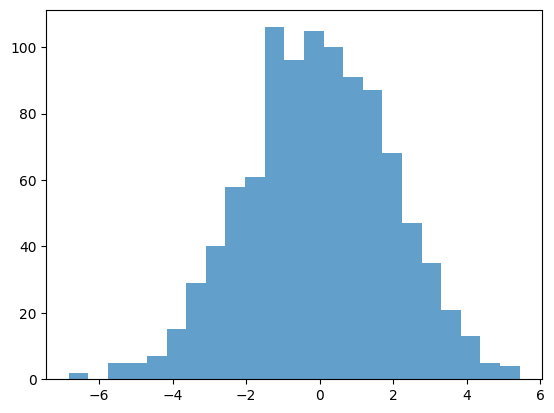

In [ ]:
# (a)
plt.hist(x=normal_sample, bins='auto',alpha=0.7)
plt.show()

In [ ]:
skew(normal_sample)

-0.10474569523585361

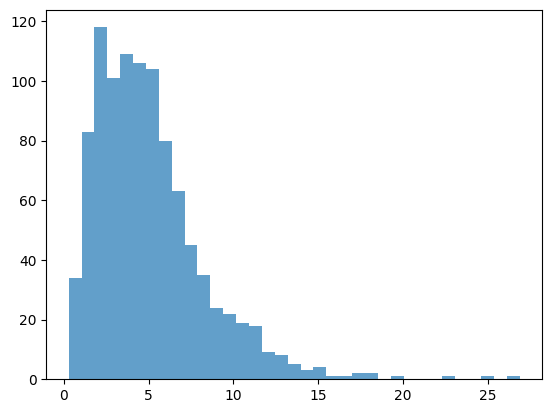

In [ ]:
plt.hist(chi_sample, bins='auto', alpha=0.7)
plt.show()

In [ ]:
skew(chi_sample)

1.6446394686163788

(b) 첨도(Kurtosis) : 이상치가 얼마나 존재하는지를 측정하는 통계량
i. 자유도가 1인 t분포, 자유도가 10인 t분포와 표준정규분포(N(0, 1))에서 표본을
생성한 후, 분포를 그리시오.
ii. 각 분포에서 첨도를 구하시오.

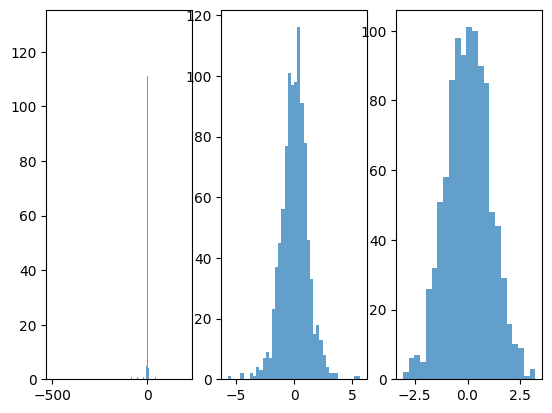

In [ ]:
#(b)
t_sample1=t.rvs(df=1,size=1000)
t_sample10=t.rvs(df=10, size=1000)
snormal_sample=norm.rvs(loc=0,scale=1, size=1000)


fig,axs=plt.subplots(1, 3)
axs[0].hist(t_sample1, bins='auto', alpha=0.7)
axs[1].hist(t_sample10, bins='auto', alpha=0.7)
axs[2].hist(snormal_sample, bins='auto', alpha=0.7)
#plt.hist(t_sample1, bins='auto', alpha=0.7)
#plt.hist(t_sample10, bins='auto', alpha=0.7)
#plt.hist(t_sample1, bins='auto', alpha=0.7)
plt.show()


In [ ]:
kurtosis(t_sample1), kurtosis(t_sample10), kurtosis(snormal_sample)

(210.93040003273478, 2.0795391601697952, -0.11113082906601646)

## 문제 5

5. (Python) Xi
i.i.d ∼ U(−1, 1)일 때, Sn = X1 + · · · + Xn 인 랜덤워크에 대해서 고려하자. 독
립적으로 생성된 두 개의 랜덤워크 {Sn : n = 1, · · · , 10000} 과 {S
0
n
: n = 1, · · · , 10000}의
상관계수를 구하시오.


In [ ]:
uniform_sample=uniform.rvs(loc=-1, scale=2, size=10000)
random_walk1=np.array([])
for i in range(10000):
  random_walk1=np.append(random_walk1, uniform_sample[0:i+1].sum())

uniform_sample=uniform.rvs(loc=-1, scale=2, size=10000)
random_walk2=np.array([])
for i in range(10000):
  random_walk2=np.append(random_walk2, uniform_sample[0:i+1].sum())


In [ ]:
np.corrcoef(random_walk1,random_walk2)

array([[1.        , 0.61392939],
       [0.61392939, 1.        ]])

## 문제 6

6. (Python) 로또는 45개의 숫자중에서 6개의 당첨번호를 추첨한다. 10번의 모의실험을 통해
당첨번호를 추출 한 후, 각 번호가 나올 확률이 동일한지를 검정하려고 한다. 다음의 절차를
따르시오.
(이때, i번째 공이 당첨번호에 포함될 확률을 pi라고 하자.)


(a) 각 번호가 나올 확률이 동일하다고 가정하고, 로또 당첨 번호를 10회 추출 하시오.

In [ ]:
#(a)
import random

winning_numbers = []
for i in range(10):
    winning_numbers.append(random.sample(range(1, 46), 6))

winning_numbers = np.array(winning_numbers)
winning_numbers

array([[24, 42, 21,  3,  8, 25],
       [28, 17, 18, 41,  4, 10],
       [19, 44, 21,  5, 14, 27],
       [36, 42, 40, 35, 14, 26],
       [18, 29,  5,  2,  3, 16],
       [25, 18, 14,  8, 16, 10],
       [21,  7, 16, 25,  9, 11],
       [31, 39, 43,  6, 41, 12],
       [26, 27, 14, 17,  2, 19],
       [32, 36, 22, 35, 20, 11]])

(b) 10개의 표본을 통해, 각 i번째 공이 당첨 번호에 포함될 확률, ˆpi을 추정하시오.

In [ ]:
#(b)
winning_numbers = np.array(winning_numbers).reshape(-1)
count_numbers = np.bincount(winning_numbers,minlength=46)[1:]
probabilities = [count/10 for count in count_numbers]

# 결과 출력
for i, prob in enumerate(probabilities):
    print(f"{i+1}의 확률: {prob}")

1의 확률: 0.0
2의 확률: 0.2
3의 확률: 0.2
4의 확률: 0.1
5의 확률: 0.2
6의 확률: 0.1
7의 확률: 0.1
8의 확률: 0.2
9의 확률: 0.1
10의 확률: 0.2
11의 확률: 0.2
12의 확률: 0.1
13의 확률: 0.0
14의 확률: 0.4
15의 확률: 0.0
16의 확률: 0.3
17의 확률: 0.2
18의 확률: 0.3
19의 확률: 0.2
20의 확률: 0.1
21의 확률: 0.3
22의 확률: 0.1
23의 확률: 0.0
24의 확률: 0.1
25의 확률: 0.3
26의 확률: 0.2
27의 확률: 0.2
28의 확률: 0.1
29의 확률: 0.1
30의 확률: 0.0
31의 확률: 0.1
32의 확률: 0.1
33의 확률: 0.0
34의 확률: 0.0
35의 확률: 0.2
36의 확률: 0.2
37의 확률: 0.0
38의 확률: 0.0
39의 확률: 0.1
40의 확률: 0.1
41의 확률: 0.2
42의 확률: 0.2
43의 확률: 0.1
44의 확률: 0.1
45의 확률: 0.0


(c) 각 i에 대해, 다음의 검정을 시행하시오, p-value가 0.05보다 작은 경우는 몇개 있는가?

  H0 : pi = 6/45 vs H1 : pi > 6/45


In [ ]:
#(c)
from statsmodels.stats.proportion import proportions_ztest
# z_stats, p_val = proportions_ztest(count_numbers[0], nobs = 10, value = 6/45, alternative = "larger")
# z_stats, p_val
pvals= [proportions_ztest(count_numbers[i], nobs=10, value= 6/45, alternative= "larger")[1] for i in range(len(count_numbers))]
pvals= np.array(pvals)
(pvals < 0.05).sum()

1

(d) 본페르니 교정을 이용하여, 다중검정을 시행하시오. p-value가 0.05/45보다 작은 경우는 몇개 있는가?

H0 : pi = 6/45 , ∀i vs H1: 어떤 i 에 대해서 pi > 6/45을 만족한다.

In [ ]:
# (d)
pvals= [proportions_ztest(count_numbers[i], nobs=10, value= 6/45, alternative= "larger")[1] for i in range(len(count_numbers))]
pvals= np.array(pvals)
(pvals < 0.05/45).sum()

0

6번 아랫쪽은 기존에 쓰여져 있던데 확인 필요합니다

In [ ]:
import numpy as np

num_trials, num_balls = winning_numbers.shape
pi_hat = np.zeros(num_balls)

for i in range(num_balls):
    print(winning_numbers[:, i],i+1)
    num_occurrences = np.sum(winning_numbers[:, i] == i+1)
    pi_hat[i] = num_occurrences / num_trials

print(pi_hat)

[29 25 38  8 17 16  3 21 32 42] 1
[37 34  9 27 30 38  6 14 44 45] 2
[45  9 25  3 24 13 18 20 36  7] 3
[25 29 45 14 37 19 29  3 31  4] 4
[40 39 36 45 21 24 10 32 40 43] 5
[13 15  4 24 28 35 43  2 11  3] 6
[0.  0.  0.1 0.1 0.  0. ]


In [ ]:
from scipy.stats import binom_test

num_rejections = 0
alpha = 0.05

for i in range(num_balls):
    p_value = binom_test(np.sum(winning_numbers[:, i] == i+1), n=num_trials, p=6/45, alternative='greater')
    if p_value < alpha:
        num_rejections += 1

print("Number of rejections: ", num_rejections)

Number of rejections:  0


<ipython-input-56-c3f26b0c07cd>:7: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = binom_test(np.sum(winning_numbers[:, i] == i+1), n=num_trials, p=6/45, alternative='greater')


In [ ]:
# (d)
num_rejections = 0
alpha = 0.05 / num_balls

for i in range(num_balls):
    p_value = binom_test(np.sum(winning_numbers[:, i] == i+1), n=num_trials, p=6/45, alternative='greater')
    if p_value < alpha:
        num_rejections += 1

print("Number of rejections after Bonferroni correction: ", num_rejections)

## 7번

(Python) 스웨인 대 알리바마 재판에서 귀무 가설은 ’공정한 배심원 선택’이고 대립가설은
’불공정한 배심원 선택’이다. 전체 인구중 26%가 흑인이다. 우리는 100명을 뽑았을 때, 8명의
흑인이 선택되었다는 데이터를 관찰하였다. 이 경우 p-value를 구하여라. (hint : 이항분포의
누적분포함수 또는 확률질량함수를 이용하시오.)

p-Value for 8 black man : 0.000005


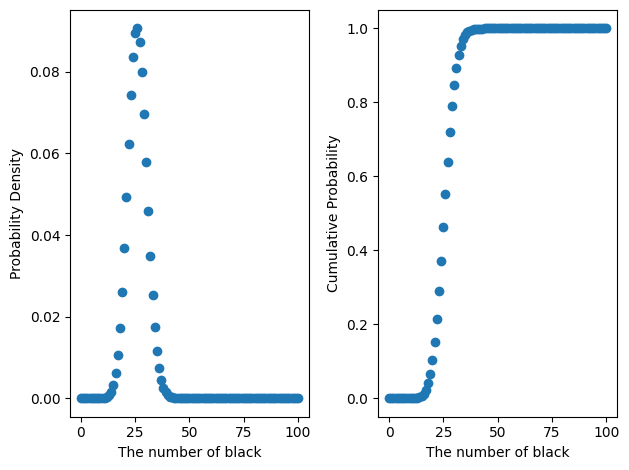

In [ ]:
# 이항분포의 n에 대한 확률질량함수 선언
def GetProbability(n):
    p=0.26
    return np.math.factorial(100)/np.math.factorial(n)/np.math.factorial(100-n)*p**n*(1-p)**(100-n)

DensityList=[]
CumulativeList=[]
Cum=0

# 흑인 n명이 선택될 확률질량값과 누적확률분포를 리스트에 저장
for i in range(101):
    DensityList.append(GetProbability(i))
    Cum+=GetProbability(i)
    CumulativeList.append(Cum)

# 흑인 8명의 p-Value(한쪽 꼬리검정이므로 0~8명까지의 누적확률분포값) 출력
print('p-Value for 8 black man : %f'%CumulativeList[8])

# X축을 흑인이 n명 선택된 경우에 대해 좌측에 확률질량분포, 우측에 누적확률분포 그래프
fig,axs=plt.subplots(1,2)
axs[0].scatter(list(range(len(DensityList))),DensityList)
axs[0].set_xlabel('The number of black')
axs[0].set_ylabel('Probability Density')
axs[1].scatter(list(range(len(CumulativeList))),CumulativeList)
axs[1].set_xlabel('The number of black')
axs[1].set_ylabel('Cumulative Probability')
plt.tight_layout()
plt.show()

## 8번

아빠의 키 Yi , 자식의 키는 Xi의 관계를 Yi = βXi + εi라고 하자. (단, Xi와 εi는 독립) Yi의 분산과 Xi의 분산이 같기 위한 필요조건이 |β| < 1임을 보이시오

Var(Y) = Var(bX+e) = b<sup>2</sup>Var(X)+Var(e) = b<sup>2</sup>Var(X)+E(e<sup>2</sup>)-E(e)<sup>2</sup> = b<sup>2</sup>Var(X)+E(e<sup>2</sup>) = Var(X) <br>
E(e<sup>2</sup>)=(1-b<sup>2</sup>)Var(X)>0<br>
Var(X)>0<br>
(1-b<sup>2</sup>)>0<br>
|b|<1

## 9번

(Python) 다음의 데이터를 주어졌다고 하자. <br>
이때, 설명변수를 (x1, x2), 반응변수를 y로 하는
선형회귀모형을 가정하고 (x1, x2) = (0.1, 0.2)일 때, <br>
Bootstrap resampling을 통한 예측구간
(prediction interval)을 추정하고자 한다. <br>
다음의 식을 만족하는 [L, U]을 xnew 일 때, 신뢰도가 (1 − α)%인 예측 구간이라고 한다.
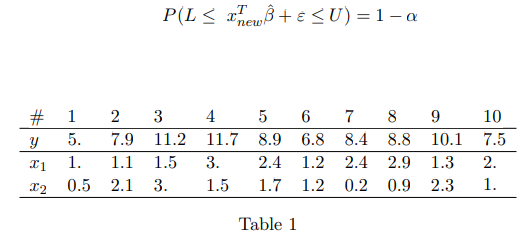

(a) Bootstrap resampling을 이용하여 boostrap sample을 얻고 이를 이용하여 선형회귀모형의 계수를 추정하시오.<br>
(b) (a)에서 추정한 모형을 이용하여 (x1, x2) = (0.1, 0.2)일 때의 예측값을 구하시오.<br>
(c) (a)에서 추정한 모형과 bootstrap sample들을 이용하여 잔차들을 구하고, 그 잔차들 중
하나의 값을 랜덤 추출 하시오.<br>
(d) (b)에서 추정한 예측값과 (c) 생성된 노이즈를 더한 값을 저장하시오.<br>
(e) (a)-(d) 과정을 2,000번 반복하시오.<br>
(f) (e) 에서 저장된 2000개의 값들을 이용하여 (x1, x2) = (0.1, 0.2)일 때의 95% 예측구간을
구하시오.

95% Confidence Interval : [L 0.931265] ~ [U 5.419776]


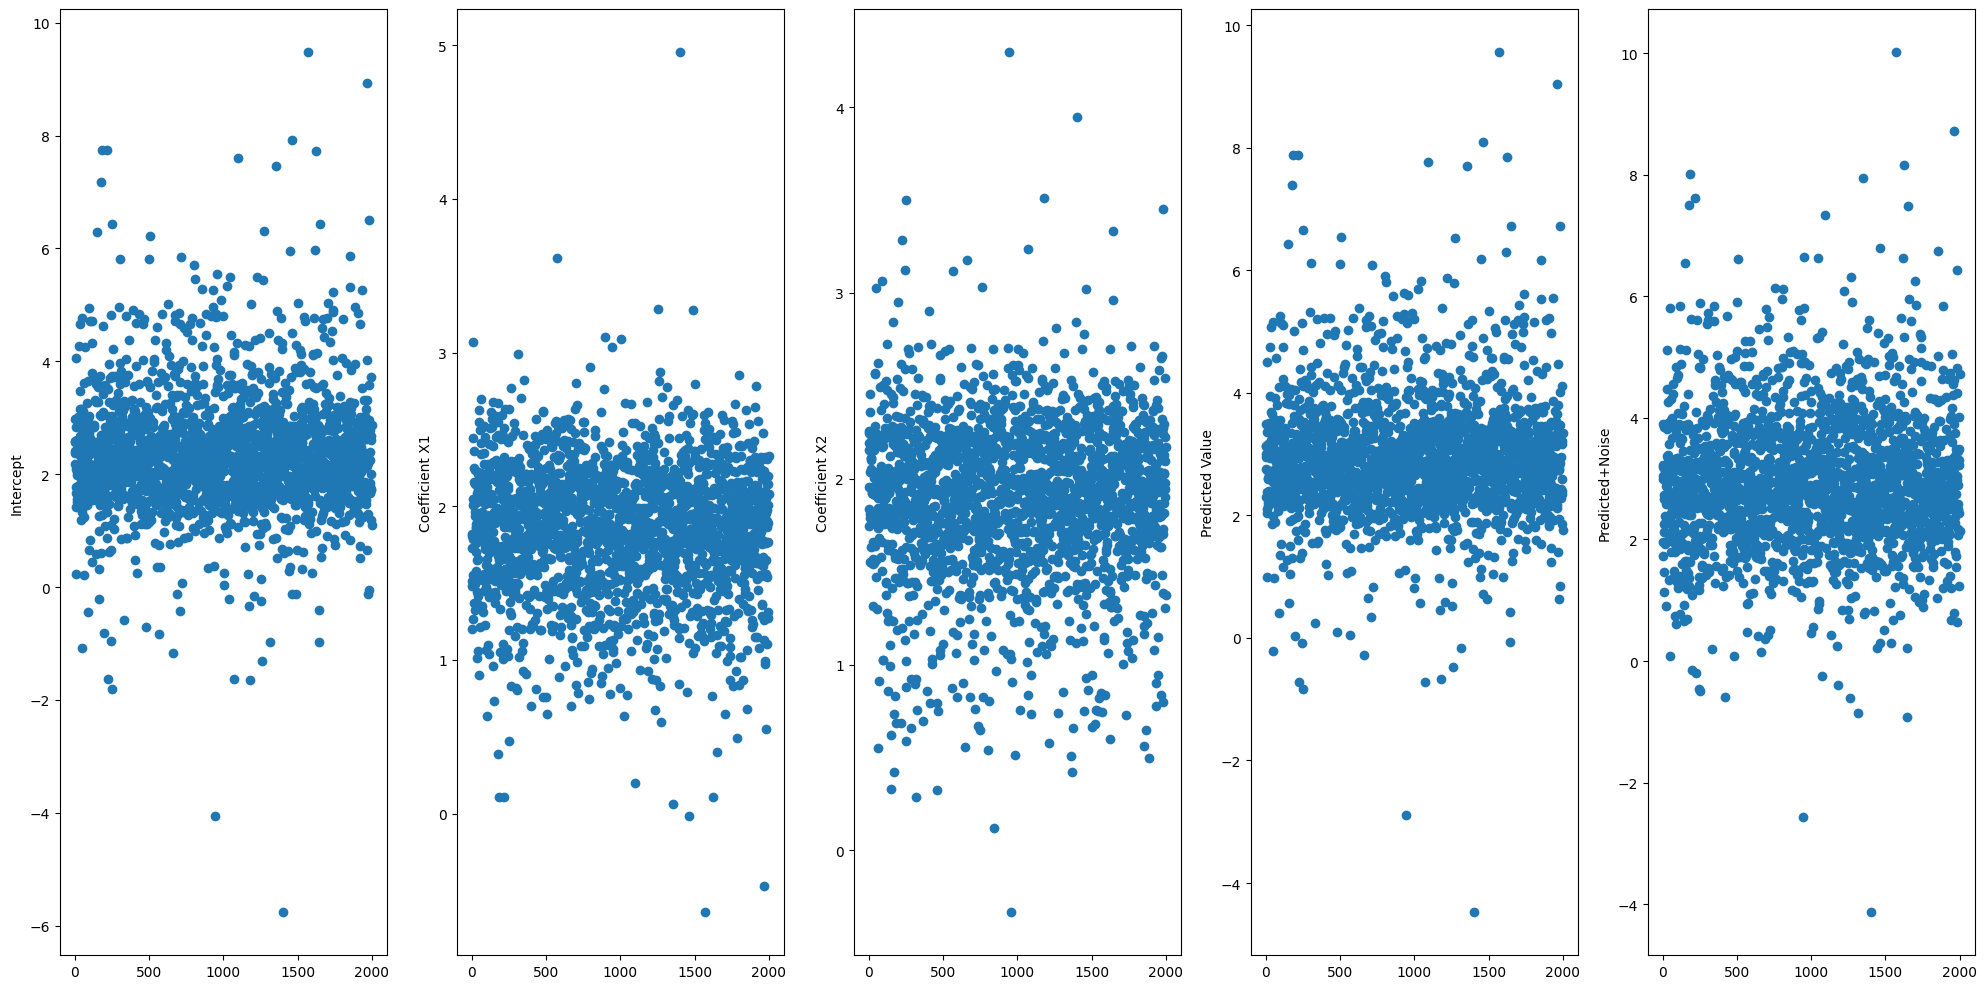

In [ ]:
# Bootstrap Data 추출 함수 선언
def GetBootstrapData(df):
    n=len(df.values)
    Data=df.values[(np.random.rand(n)*n).astype('int')]
    return Data

# 원본 데이터 입력
y=[5,7.9,11.2,11.7,8.9,6.8,8.4,8.8,10.1,7.5]
x1=[1,1.1,1.5,3,2.4,1.2,2.4,2.9,1.3,2]
x2=[0.5,2.1,3,1.5,1.7,1.2,0.2,0.9,2.3,1]
df=pd.DataFrame({'x1':x1,'x2':x2,'y':y})
LR=LinearRegression()

intercept_List=[]
coef_List=[]
predict_List=[]
save_List=[]

# 문제풀이 시작
for i in range(2000):
    Data=GetBootstrapData(df)
    LR.fit(Data[:,:2],Data[:,2])
    
    # (a) Get Coefficients
    intercept_List.append(LR.intercept_)
    coef_List.append(LR.coef_)
    
    # (b) Get Predicted Value
    predict_List.append(LR.predict(np.array([[0.1,0.2]])))
    
    # (c) Extract Random Error
    Y_Predict=LR.predict(Data[:,:2])
    Errors=Data[:,2]-Y_Predict
    Error=Errors[int(np.random.rand(1)*len(Errors))]
    
    # (d) Save Predicted Value + Error
    save_List.append(predict_List[-1]+Error)
    
    # (e) Loop 2000

coef_List=np.array(coef_List)

# (f) Get 95% Confidence Interval
print('95%% Confidence Interval : [L %f] ~ [U %f]'%(np.percentile(save_List,q=2.5),np.percentile(save_List,q=97.5)))

# 각 계산값 분포 시각화 [ 1: 절편, 2: X1 계수, 3: X2 계수, 4: 예측값, 5: 예측값+노이즈 ]
fig,axs=plt.subplots(1,5,figsize=(20,10))
axs[0].scatter(list(range(len(intercept_List))),intercept_List)
axs[0].set_ylabel('Intercept')
axs[1].scatter(list(range(len(coef_List))),coef_List[:,0])
axs[1].set_ylabel('Coefficient X1')
axs[2].scatter(list(range(len(coef_List))),coef_List[:,1])
axs[2].set_ylabel('Coefficient X2')
axs[3].scatter(list(range(len(predict_List))),predict_List)
axs[3].set_ylabel('Predicted Value')
axs[4].scatter(list(range(len(save_List))),save_List)
axs[4].set_ylabel('Predicted+Noise')
plt.tight_layout()
plt.show()



## 10번

문제 9의 table 1 데이터를 이용하자. 선형 모형의 잔차(εbi = yi − yˆi)들을 이용하여 QQ-plot
을 그리고 해석하시오.

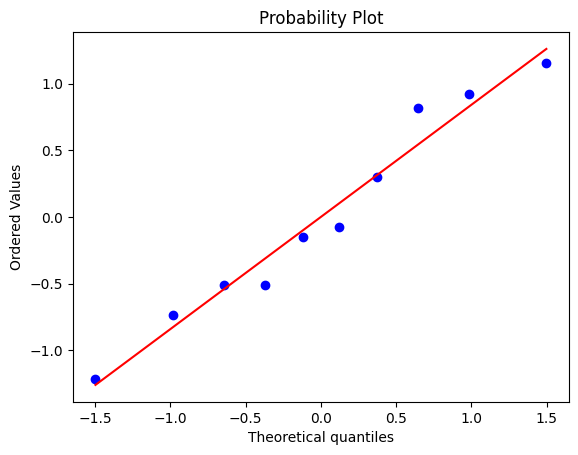

In [ ]:
df=pd.DataFrame({'x1':x1,'x2':x2,'y':y})

# 선형회귀 실행
LR=LinearRegression()
LR.fit(df.values[:,:2],df.values[:,2])

# 회귀 예측값
y_predict=LR.predict(df.values[:,:2])

# 회귀 잔차
errors=df['y'].values-y_predict

# QQ-Plot
plt.figure(1)
scipy.stats.probplot(errors,dist=scipy.stats.norm,plot=plt)
plt.show()

## 11번

(Python) 데이터는 아래의 table 2.2 와 같이 주어져 있다. <br>
Inverse Probability weighting을
이용하여 평균 처리효과 τb
ipw를 추정 하시오.

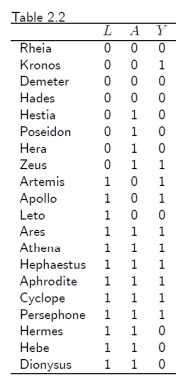

In [ ]:
L=[0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1]
A=[0,0,0,0,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1]
Y=[0,1,0,0,0,0,0,1,1,1,0,1,1,1,1,1,1,0,0,0]
df=pd.DataFrame({'L':L,'A':A,'Y':Y})

# P(Ai=1|Y) 확률 계산
LogitR=LogisticRegression()
LogitR.fit(df['L'].values.reshape(-1,1),df['A'].values.reshape(-1,1))

# ipw 계산
ipw=df['A'].values*df['Y'].values/LogitR.predict_proba(df['L'].values.reshape(-1,1))[:,1]-(1-df['A']).values*df['Y'].values/(1-LogitR.predict_proba(df['L'].values.reshape(-1,1))[:,1])
print('ipw : %f'%np.average(ipw))

ipw : 0.061940


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 12번

(Python) (차원의 저주) 차원의 저주에 대한 모의 실험을 위해 아래의 절차를 따르시오.
Xi ∈ R
d를 고려하자.<br>
(a) d=1 일때, X ∼ U(−3, 3)를 따르는 데이터를 50개 생성하시오.<br>
(b) Xi > 0 이면 Yi = 1, 그렇지 않으면 Yi = 0인 데이터를 생성하시오.<br>
(c) 학습데이터와 테스트데이터의 비율이 0.5가 되도록 나누시오.<br>
(d) 학습데이터로 K-NN(K=3)을 모형을 학습하고, 테스트 데이터를 이용하여 정확도를
계산하시오.<br>
(e) (a) ∼ (d)의 과정을 d = 2, · · · , 40 까지 반복하고, 정확도를 저장하시오.(d ≥ 2 일 때는,
생성된 Xi ∼ U(−3, 3)d 데이터들의 1번째 성분이 0보다 크면 1, 아니면 0으로 레이블링
하시오.)<br>
(f) X축을 d(차원의 수), Y축을 정확도로 하는 그래프를 그리시오.<br>

Accuracy : 0.960000


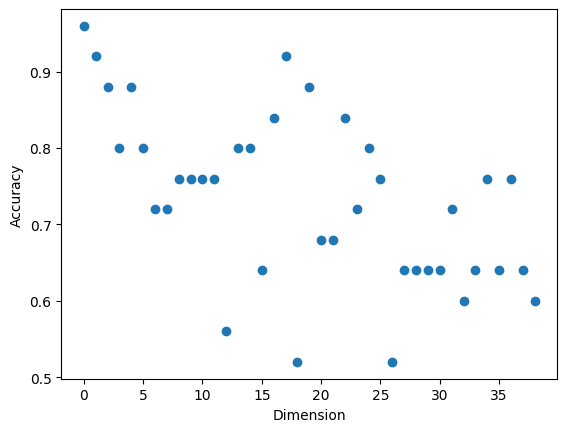

In [ ]:
# (a) X~U(-3,3) Sampling (n=50)
X=np.random.rand(50)*6-3

# (b) Get Y (X>0 then Y=1 else Y=0)
Y=np.where(X>0,1,0)

# (c) Split into train and test with the ratio of 0.5
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5)

# (d) Implement KNN
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train.reshape(-1,1),Y_train)
Y_test_predict=knn.predict(X_test.reshape(-1,1))
print('Accuracy : %f'%accuracy_score(Y_test,Y_test_predict))

# (e) Do it with the 2~40 dimensions
Accuracy_List=[]
for d in range(2,41):
    X=np.random.rand(50,d)*6-3
    Y=np.where(X[:,0]>0,1,0)
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5)
    knn.fit(X_train,Y_train)
    Y_test_predict=knn.predict(X_test)
    Accuracy_List.append(accuracy_score(Y_test,Y_test_predict))
    
# (f) Plot the Dimension-Accuracy Graph
plt.scatter(list(range(len(Accuracy_List))),Accuracy_List)
plt.xlabel('Dimension')
plt.ylabel('Accuracy')
plt.show()

##13번
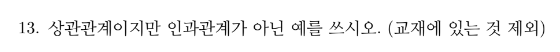

예 1) 화재 현장에 출동하는 소방 대원이 많을수록 화재의 규모는 크다.
따라서 출동하는 소방 대원이 많아지는 것이 화재가 커지는 원인이다.
⇒ 소방 대원의 인원 수와 화재 규모 간에는 강한 상관관계가 있지만, 위와 같은 인과 관계
는 존재하지 않는다. 실제는 화재가 크기 때문에 다수의 소방 대원이 출동한 것이다.

예 2) 여름에 아이스크림이 가장 많이 팔렸고 그 기간에 익사자가 가장 많이 발생하였다.
따라서 익사 사망자가 늘어나는 것은 아이스크림이 그 원인이다
⇒ 여름에 아이스크림이 많이 팔리는 것과 익사자가 많이 발생하는 것 간에는 인과관계가
성립되지 않으나 두 사건 간의 상관관계를 기반으로 인과관계로 잘못 결론지었다

##14번
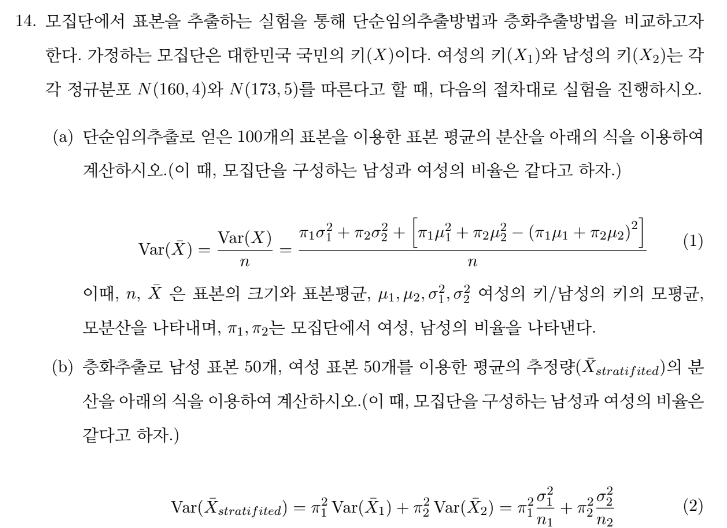

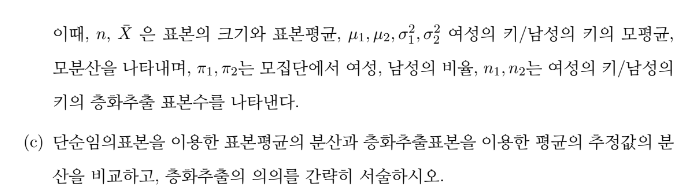

In [ ]:
#(a)
m=np.array([160,173])
var=np.array([4,5])

n=100
gen=np.random.choice(range(2),replace=True,p=[0.5,0.5],size=n)
X=norm.rvs(loc=m[gen], scale=var[gen]**0.5)

varX=(0.5*var[0]+0.5*var[1]+(0.5*m[0]**2+0.5*m[1]**2-(0.5*m[0]+0.5*m[1])**2))/n
print(varX)


0.4675


In [ ]:
#(b)
n=50
X_female=norm.rvs(loc=m[0], scale=var[0]**0.5)
X_male=norm.rvs(loc=m[1],scale=var[1]**0.5)
X=np.vstack([X_female,X_male])

varX=0.5**2*var[0]/n+0.5**2*var[1]/n
print(varX)

0.045


(c)
층화추출 시 표본평균의 분산이 더 작으므로 단순임의추출 대비 신뢰성 높은 추정치를 구할 수 있다.

##15번
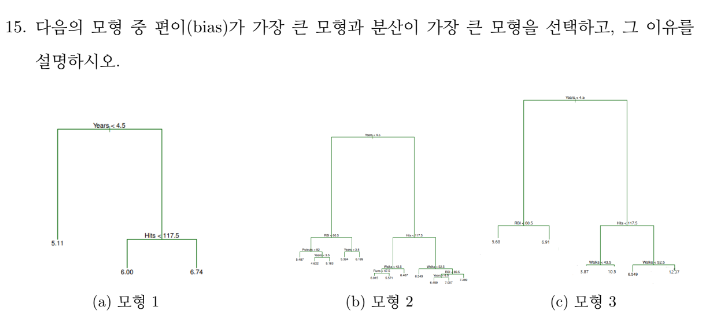

편이-분산 균현(Bias-Variance Trade-Off)에 따르면 모델이 복잡해지면 bias는 작지만 variance가 커지는 경향이있다.
모델이 단순하면 bias는 커지고 variance는 작아진다. 
모형 1의 복잡도가 가장 낮으므로 bias가 가장큰모델이다.
모형 2의 복잡도가 가장 크므로 variance가 가장 큰 모델이다.

##16번
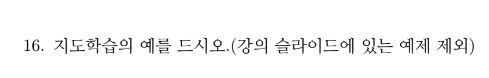


고양이와 강아지의 사진 데이터셋이 있다.
이 사진들을 가지고 고양이와 강아지인지 판단하는 분류기를 만들때, 각 사진에 고양이면 0 , 강아지면 1로 라벨링이 되어 있어 정답이 주어져있다면 지도학습이라고 할 수 있다.

##17번
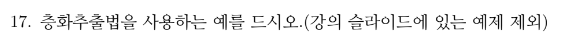

지역별 인구조사 샘플링
특정 지역의 인구조사를 할 때, 해당 지역을 도시와 농촌으로 나눈 후 각각에서 샘플을 추출할 수 있다. 이렇게 하면 도시와 농촌의 인구특성을 고려한 샘플을 얻을 수 있다.

##18번
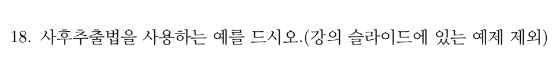

온라인게임이 범죄에 미치는 영향에 대한 연구에서, 전체 인구에서 샘플을 뽑는 것이 아니라,
범죄자 중 온라인게임을 한 사람 일부와 온라인게임을 해본적 없는 사람 일부를 뽑아 합쳐서 표본을 만드는 방법이 사후추출법

##19번

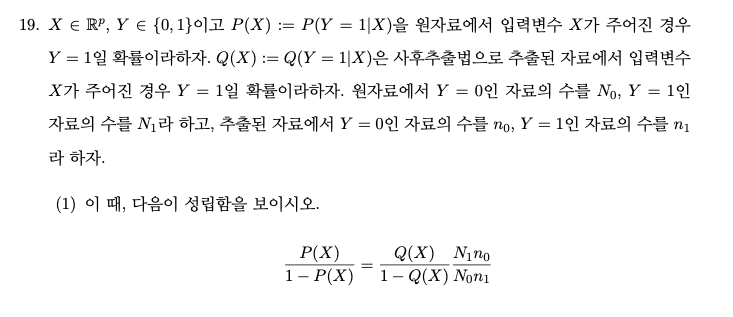

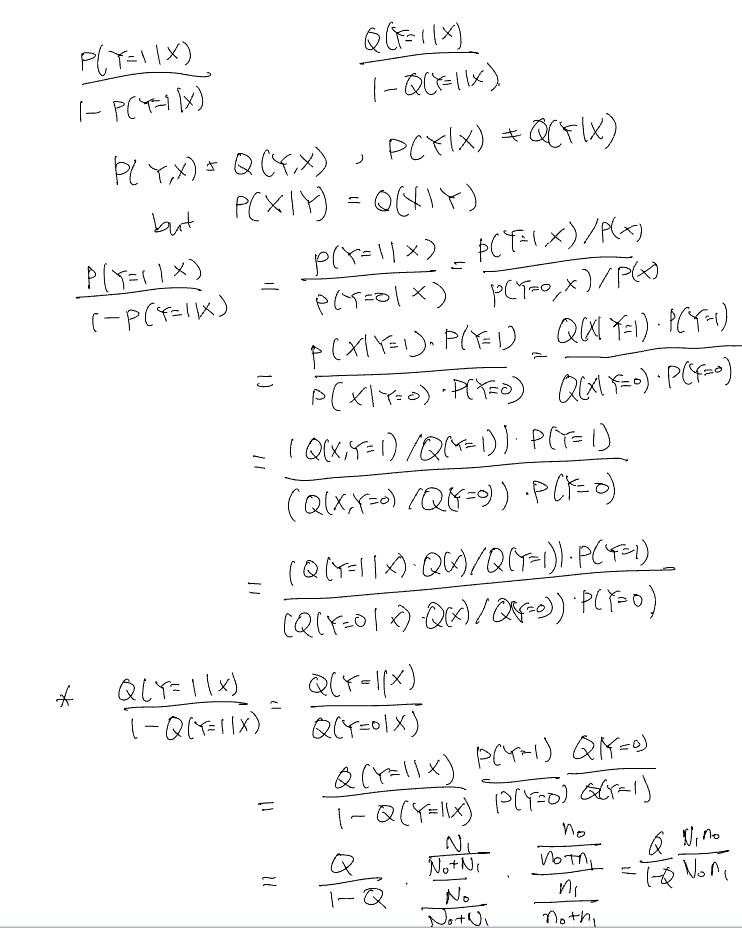

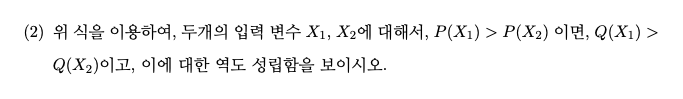

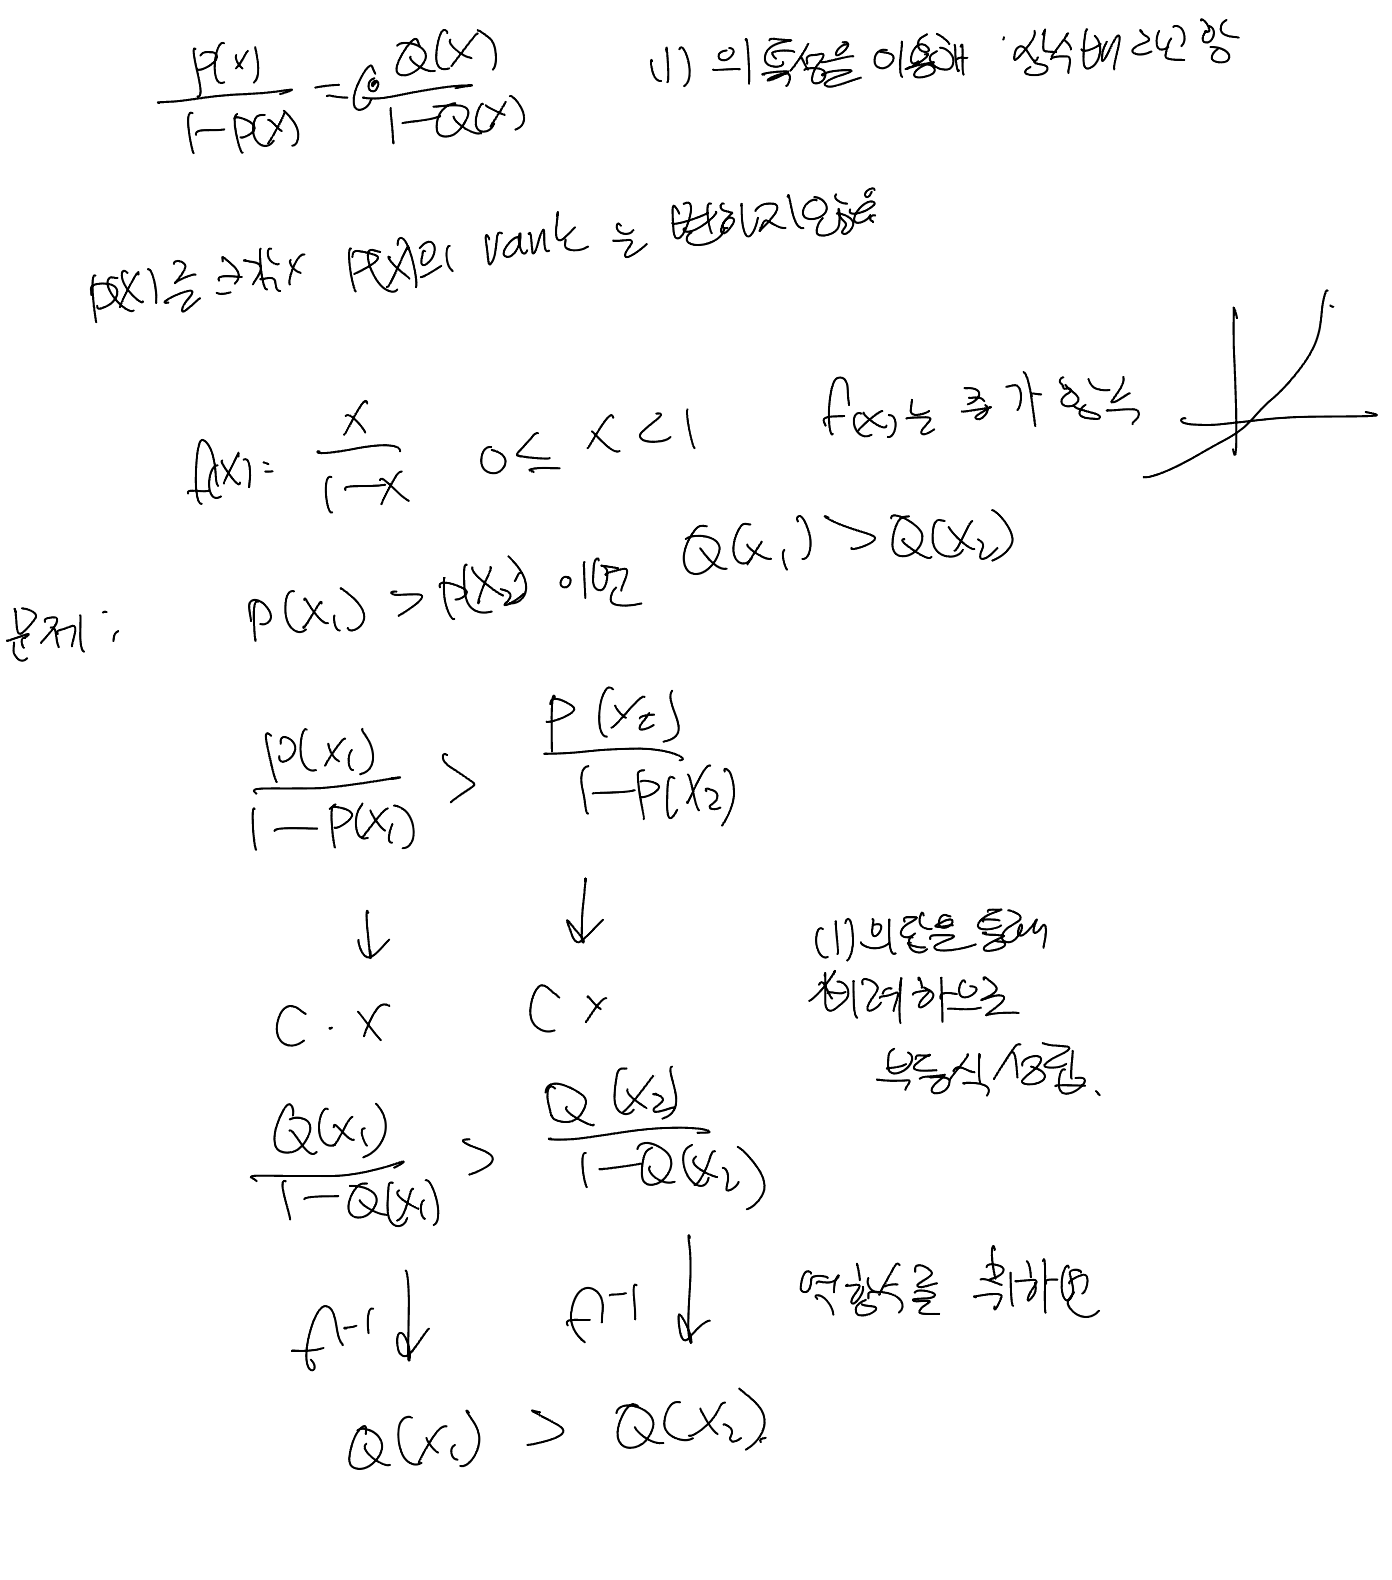

##20번

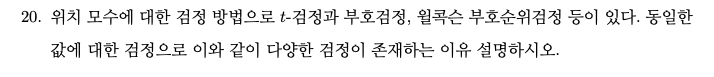

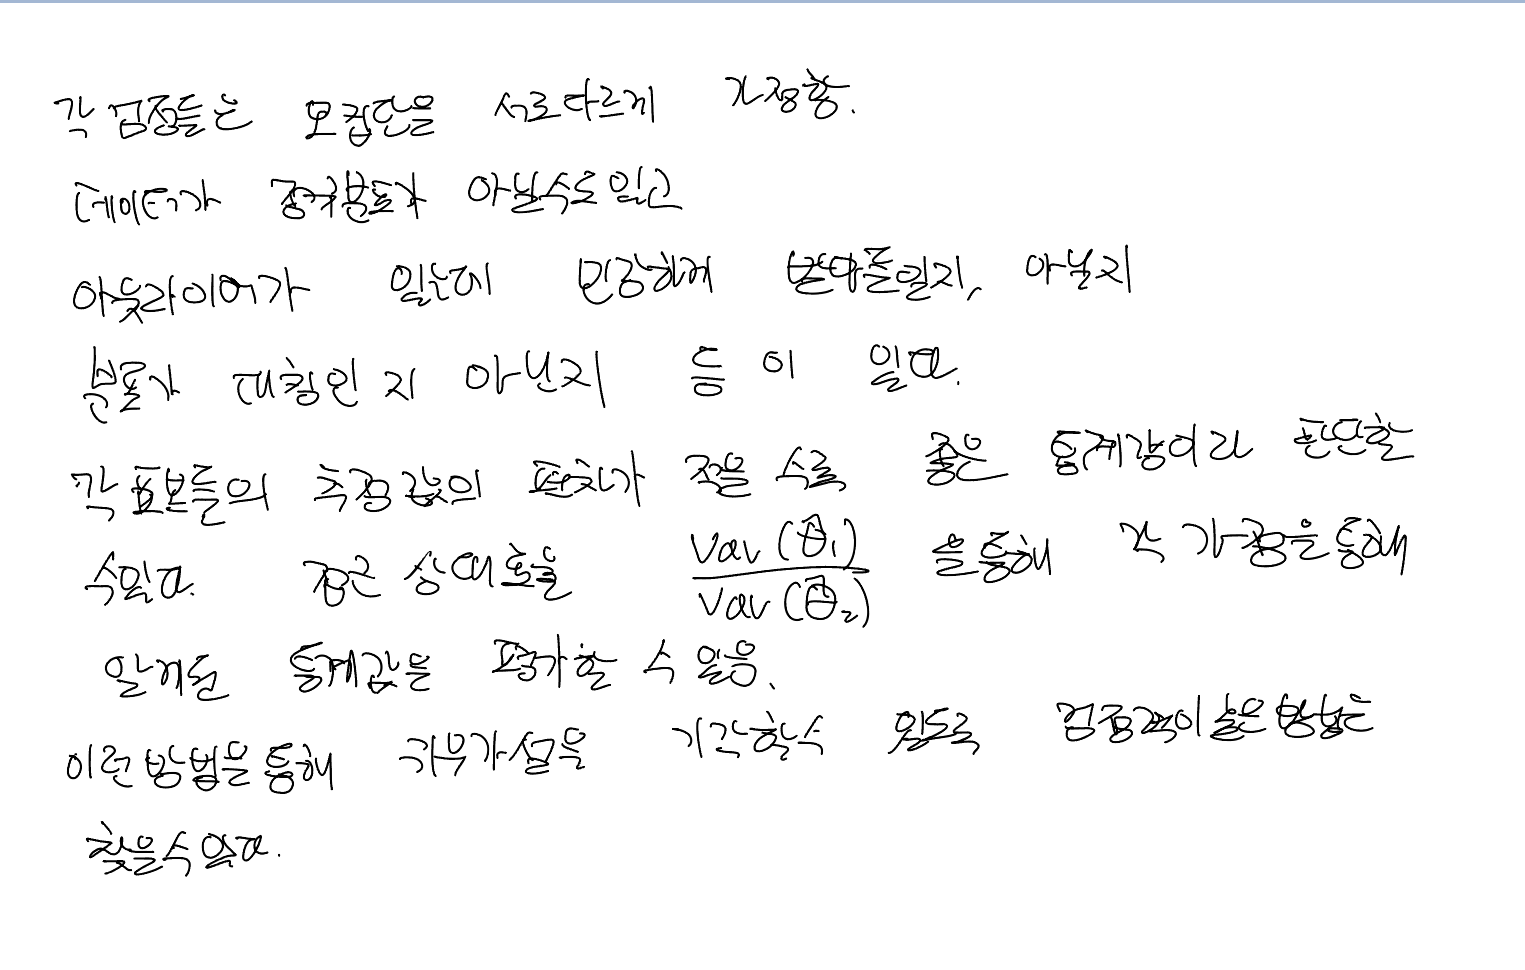

##21번

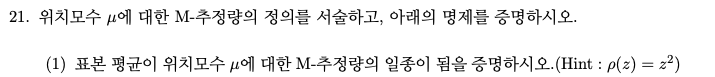

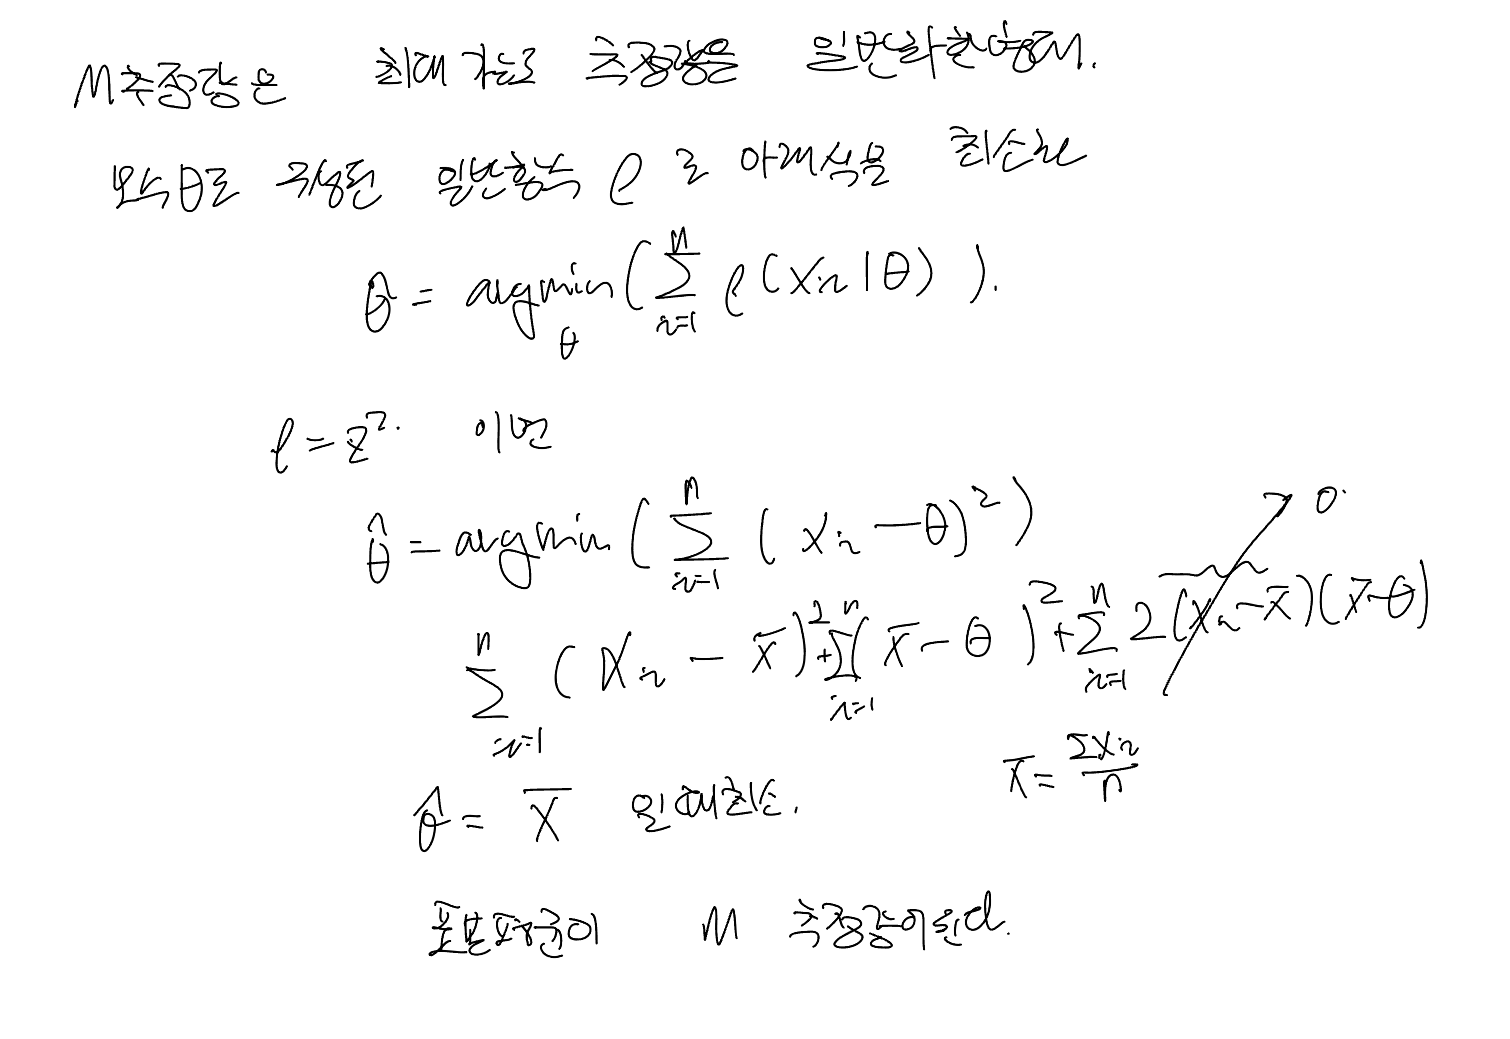

##22번

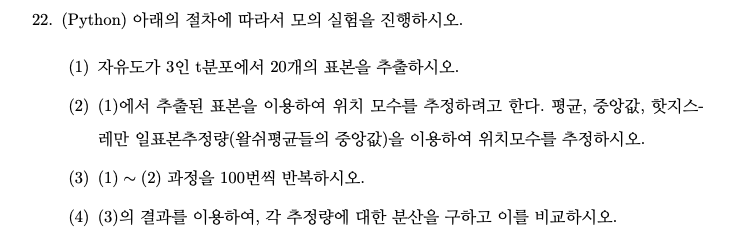

In [19]:
from scipy.stats import t

t_sample=t.rvs(df=3,size=20)

In [20]:
import itertools
import numpy as np
t_sample.mean(),np.median(t_sample),np.median(np.array(list(itertools.combinations(t_sample,2))).mean(1))

(-0.1987825315863045, -0.023967895833081822, -0.24868036668359833)

In [22]:
t_mean=[]
t_median=[]
t_hodges=[]

for _ in range(100):
  t_sample=t.rvs(df=3,size=20)
  t_mean.append(t_sample.mean())
  t_median.append(np.median(t_sample))
  t_hodges.append(np.median(np.array(list(itertools.combinations(t_sample,2))).mean(1)))



In [24]:
t_mean=np.array(t_mean)
t_median=np.array(t_median)
t_hodges=np.array(t_hodges)

print(t_mean.var(),t_median.var(),t_hodges.var())
print("hodges 결과가 제일 분산이 작다. t분포가 제일 분산이 크다.")

0.16912279673443606 0.09899218061544467 0.08600255394589323
hodges 결과가 제일 분산이 작다. t분포가 제일 분산이 크다.


##23번

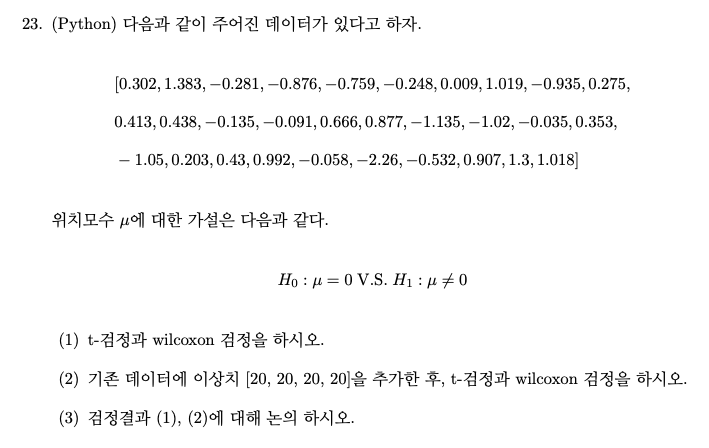

In [25]:
from scipy.stats import wilcoxon, ttest_1samp

data=[0.302, 1.383, -0.281, -0.876, -0.759, 
 -0.248, 0.009, 1.019, -0.935, 0.275, 
 0.413, 0.438, -0.135, -0.091, 0.666, 
 0.877, -1.135, -1.02, -0.035, 0.353, 
 -1.05, 0.203, 0.43, 0.992, -0.058, 
 -2.26, -0.532, 0.907, 1.3, 1.018]

print(wilcoxon(data,zero_method='wilcox'))
print(ttest_1samp(data,popmean=0))

WilcoxonResult(statistic=209.0, pvalue=0.6408254038542509)
TtestResult(statistic=0.2525789170103984, pvalue=0.802375348872962, df=29)


In [26]:
data.extend([20,20,20,20])
print(wilcoxon(data,zero_method='wilcox'))
print(ttest_1samp(data,popmean=0))

WilcoxonResult(statistic=209.0, pvalue=0.13375806238036603)
TtestResult(statistic=2.116898826416871, pvalue=0.04189343614647348, df=33)


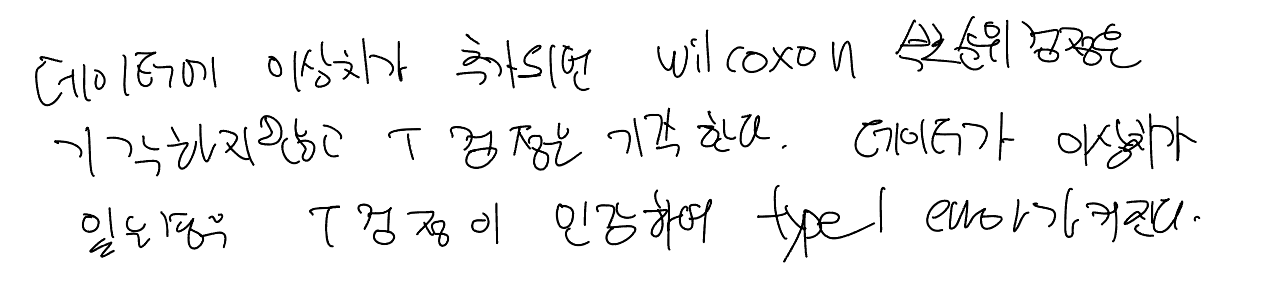

##24번

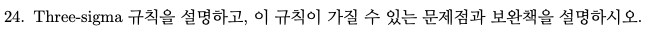

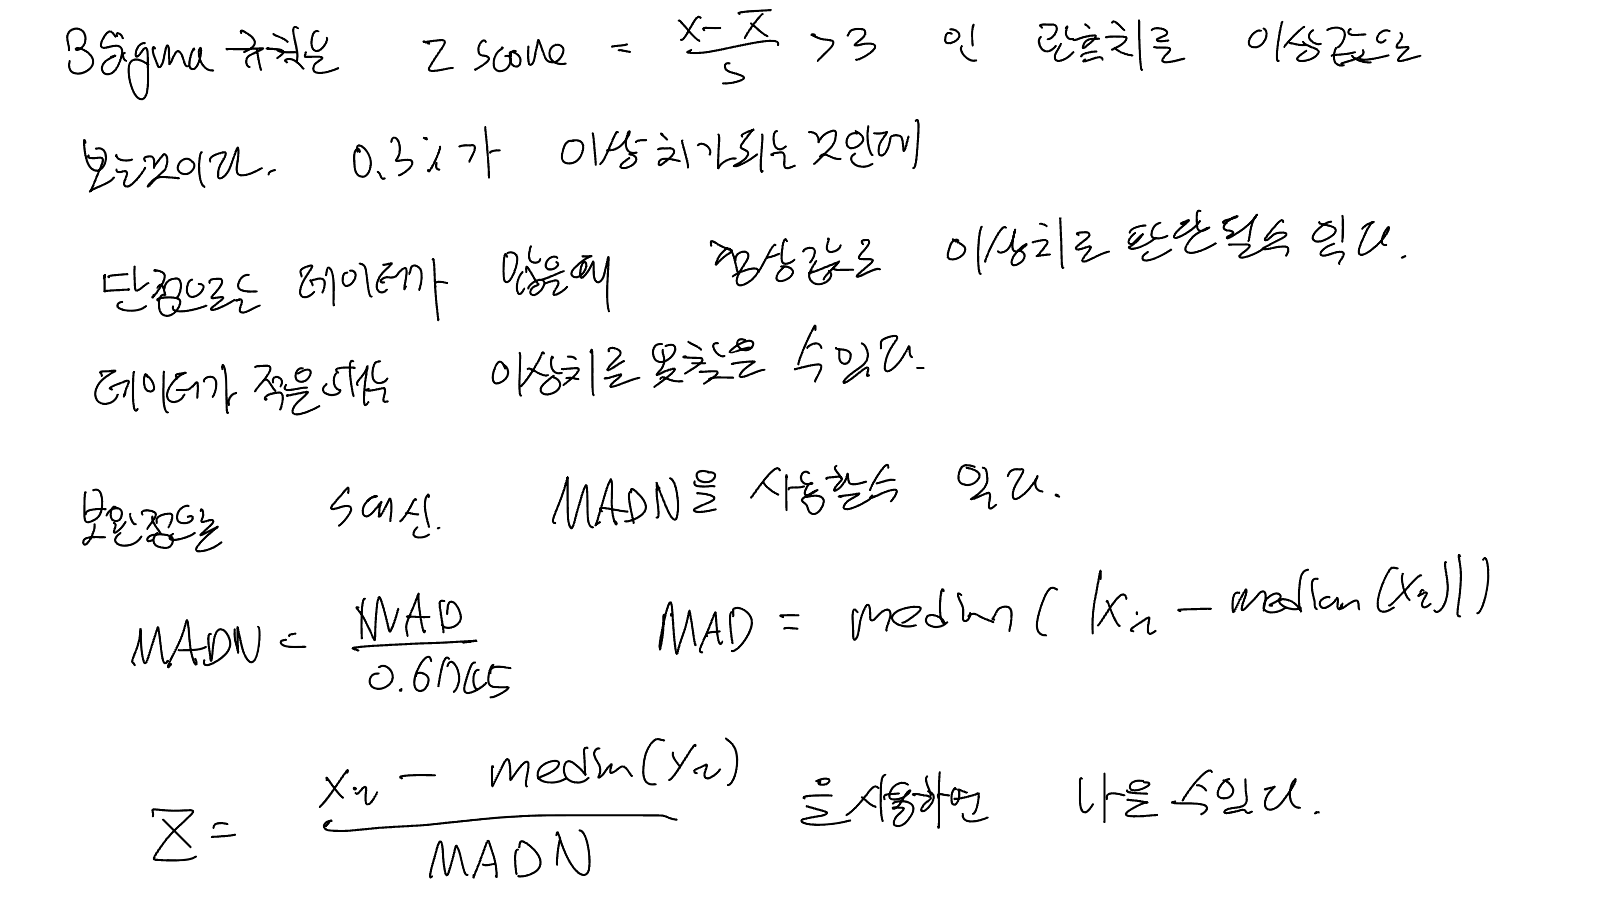

##25번

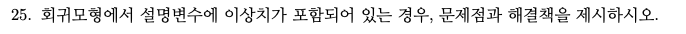

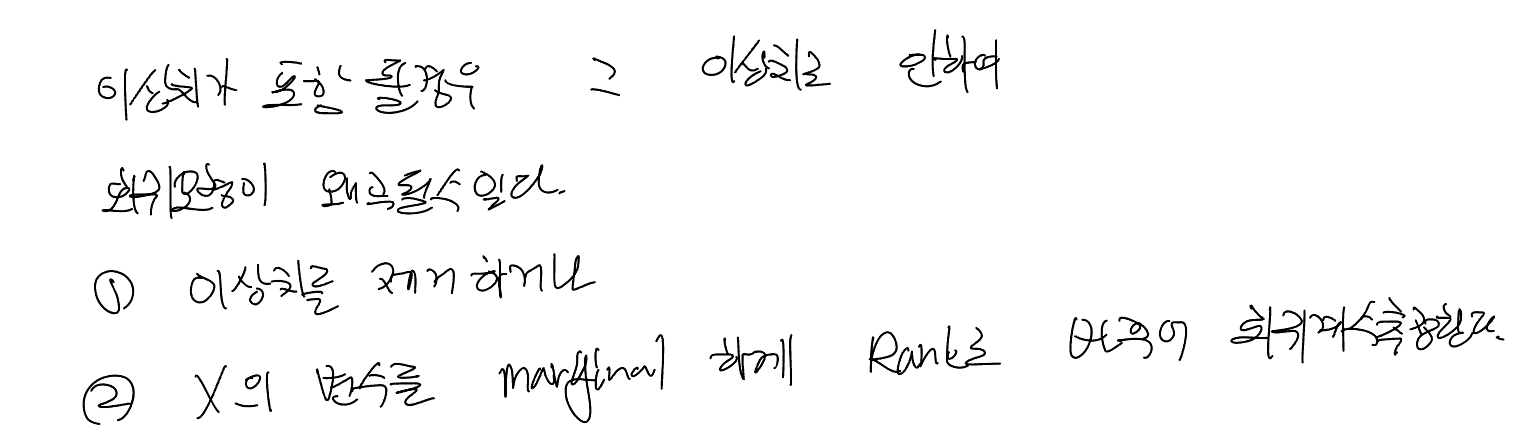